# **Описание кейса**

В данном кейсе собран опрос среди 6607 студентов состоящий из 20 параметров (колонок)

**Исходные данные**

Hours_Studied: количество часов обучения в неделю.

Attendance: посещаемость в процентах.

Parental_Involvement: уровень родительской вовлеченности в обучение студентов.

Access_to_Resources: доступность образовательных ресурсов.

Extracurricular_Activities: внеклассные занятия.

Sleep_Hours: среднее время сна за ночь.

Previous_Scores: предыдущие экзаменационные оценки .

Motivation_Level: мотивация студентов для достижения академических целей.

Internet_Access: доступ к интернету.

Tutoring_Sessions: количество занятий с ментором или репетитором.

Family_Income: уровень дохода семьи.

Teacher_Quality: квалификация преподавателя.

School_Type: тип учебного заведения (государственная, частная).

Peer_Influence: уровень влияния студентческого окружения на успеваемость студента.

Physical_Activity: количество физической активности.

Learning_Disabilities: есть ли сложности в обучении.

Parental_Education_Level: образование родителей студентов.

Distance_from_Home: расстояние от учебного заведения до дома.

Gender: пол.

Exam_Score: экзаменационные баллы за последний экзамен.

# **Цели и задачи**

Цель анализа - получить данные по тем факторам, которые влияние на экзаменационные баллы.

Задача: выполнить предварительную обработку данных, провести их анализ полученных результатов, визуализировать ключевые выводы.


# **Подготовка данных: очищение, консолидация и обогащение данных**

In [ ]:
# Import Libraries

#Data-set Analysis lib
import pandas as pd
import numpy as np

#Data-set Visualization lib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.image as mpimg
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
education_df = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [ ]:
# Dataset First Look
education_df.tail(5).T

,6602,6603,6604,6605,6606
Hours_Studied,25,23,20,10,15
Attendance,69,76,90,86,67
Parental_Involvement,High,High,Medium,High,Medium
Access_to_Resources,Medium,Medium,Low,High,Low
Extracurricular_Activities,No,No,Yes,Yes,Yes
Sleep_Hours,7,8,6,6,9
Previous_Scores,76,81,65,91,94
Motivation_Level,Medium,Medium,Low,High,Medium
Internet_Access,Yes,Yes,Yes,Yes,Yes
Tutoring_Sessions,1,3,3,2,0


In [ ]:
# Dataset Rows & Columns count
print(f'Number of Rows in {education_df.shape[0]}')
print(f'Number of Columns in {education_df.shape[1]}')

Number of Rows in 6607
Number of Columns in 20


In [ ]:
# Dataset Info
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Dataset Duplicate Value Count
education_df.duplicated().sum()

np.int64(0)

In [ ]:
# Missing Values/Null Values Count
education_df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Dataset Columns просмотр названия столбцов
education_df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df=education_df.copy()

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f'{column} : {len(df[column].unique())}')

Hours_Studied : 41
Attendance : 41
Parental_Involvement : 3
Access_to_Resources : 3
Extracurricular_Activities : 2
Sleep_Hours : 7
Previous_Scores : 51
Motivation_Level : 3
Internet_Access : 2
Tutoring_Sessions : 9
Family_Income : 3
Teacher_Quality : 4
School_Type : 2
Peer_Influence : 3
Physical_Activity : 7
Learning_Disabilities : 2
Parental_Education_Level : 4
Distance_from_Home : 4
Gender : 2
Exam_Score : 45


In [ ]:
unique_values = {} # создаем словарь для уникальных значений

for column in df.columns:

    unique_values[column] = sorted(df[column].astype(str).unique()) # формируем переменные в формат строки

for column, values in unique_values.items():
    print(f"Unique values for '{column}':")
    print(values)
    print()

Unique values for 'Hours_Studied':
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '43', '44', '5', '6', '7', '8', '9']

Unique values for 'Attendance':
['100', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']

Unique values for 'Parental_Involvement':
['High', 'Low', 'Medium']

Unique values for 'Access_to_Resources':
['High', 'Low', 'Medium']

Unique values for 'Extracurricular_Activities':
['No', 'Yes']

Unique values for 'Sleep_Hours':
['10', '4', '5', '6', '7', '8', '9']

Unique values for 'Previous_Scores':
['100', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71

In [ ]:
df['Parental_Education_Level'].fillna('others',inplace = True)
df['Distance_from_Home'].fillna('others',inplace = True)
df['Teacher_Quality'].fillna('others',inplace = True)

# Missing Values/Null Values Count (проверка заменились ли значения пустые на others)
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Есть аномальные данные, где при 0 ч обучения у студента мужского пола высокие показатели по экзаменам, для более корректного получения стат значимых результатов, удалим эту строку из датасета.

In [ ]:
filtered_df = df[(df['Gender'] == 'Male') & (df['Hours_Studied'] <= 1)]

# Получаем уникальные значения столбца Exam_Score
unique_exam_scores = filtered_df['Exam_Score'].unique()

# Сортируем и выводим уникальные значения
sorted_unique_exam_scores = sorted(unique_exam_scores)

# Фильтруем строки по заданному критерию: мужчины, учившиеся ≤ 1 часа
filtered_df = df[(df['Gender'] == 'Male') & (df['Hours_Studied'] <= 1)]

# Подсчитываем количество тех, кто получил 92 балла
num_students_with_92 = filtered_df[filtered_df['Exam_Score'] == 92].shape[0]


print(f"Уникальные значения в колонке Exam_Score для мужчин, учившихся меньше 1ч:")
print(sorted_unique_exam_scores)
print()
print(f"Количество студентов, получивших 92 балла среди мужчин, учившихся ≤ 1 часа:", num_students_with_92)

# удаляем эту строку из df и выводим для проверки получившееся кол-во строк
new_df = df[~((df['Exam_Score'] == 92) & (df['Hours_Studied'] == 1))]
# Dataset Rows & Columns count
print()
print(f'Number of Rows in {new_df.shape[0]}')
print(f'Number of Columns in {new_df.shape[1]}')

Уникальные значения в колонке Exam_Score для мужчин, учившихся меньше 1ч:
[np.int64(60), np.int64(92)]

Количество студентов, получивших 92 балла среди мужчин, учившихся ≤ 1 часа: 1

Number of Rows in 6606
Number of Columns in 20


In [ ]:
new_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6606.0,19.978202,5.986496,1.0,16.0,20.0,24.0,44.0
Attendance,6606.0,79.976234,11.547927,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6606.0,7.029519,1.467758,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6606.0,75.070996,14.400825,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6606.0,1.493491,1.230524,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6606.0,2.967757,1.031240,0.0,2.0,3.0,4.0,6.0
Exam_Score,6606.0,67.231910,3.878798,55.0,65.0,67.0,69.0,101.0


In [ ]:
# Фильтруем строки по заданному критерию: мужчины, учившиеся ≤ 1 часа
num_students_with_101 = new_df[new_df['Exam_Score'] == 101].shape[0]


print(f"Количество студентов, получивших 101 балл :", num_students_with_101)
# удаляем ненужную строку из df и выводим для проверки получившееся кол-во строк в df
new_df = new_df[~(new_df['Exam_Score'] == 101)]
print()
# Dataset Rows & Columns count
print(f'Number of Rows in {new_df.shape[0]}')
print(f'Number of Columns in {new_df.shape[1]}')

Количество студентов, получивших 101 балл : 1

Number of Rows in 6605
Number of Columns in 20


Убрали из датафрейма студента, у которого за экзамен 101 балл в связи с возможной ошибкой

# **Исследовательский анализ EDA**

In [ ]:
# Извлекаем данные из столбца 'Exam_Score'
exam_scores = df['Exam_Score']

# Функции обработки данных
def calculate_range(df_column):
    """Рассчёт размаха"""
    return np.max(df_column) - np.min(df_column)

def calculate_variance(df_column):
    """Расчет дисперсии"""
    mean = np.mean(df_column)
    return np.sum((df_column - mean)**2) / len(df_column)

def calculate_standard_deviation(df_column):
    """Расчет стандартного отклонения"""
    variance = calculate_variance(df_column)
    return np.sqrt(variance)

# Применяем функции к данным
data_range = calculate_range(exam_scores)
variance = calculate_variance(exam_scores)
std_deviation = calculate_standard_deviation(exam_scores)

# Вывод результатов
print(f"Размах: {data_range:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Стандартное отклонение: {std_deviation:.2f}")

Размах: 46.00
Дисперсия: 15.13
Стандартное отклонение: 3.89


**Размах равный 46 говорит о широком разбросе баллов:** некоторые студенты получили значительно лучшие оценки, чем остальные.

**Дисперсия: 15.13** довольно значительная, она **подтверждает наличие значительного различия** в успеваемости студентов.

Высокое стандартное **отклонение 3,89 свидетельствует о значительных колебаниях в уровне подготовки студентов**.

Данные указывают на неоднородность уровня подготовки студентов, значительную разницу в успехах разных учеников.

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


В целом, студенты тратят достаточное количествовремени на обучение: в среднем 16-24ч. Посещаемость анализируемых студентов также на высоком уровне (Attendance  в %). Также можно сделать выводы о достаточном количестве сна.

**Общий срез**

             Exam_Score  Hours_Studied  Sleep_Hours  Physical_Activity
Q1                 65.0           16.0          6.0                2.0
Q2 (Median)        67.0           20.0          7.0                3.0
Q3                 69.0           24.0          8.0                4.0
IQR                 4.0            8.0          2.0                2.0

Мода: 68



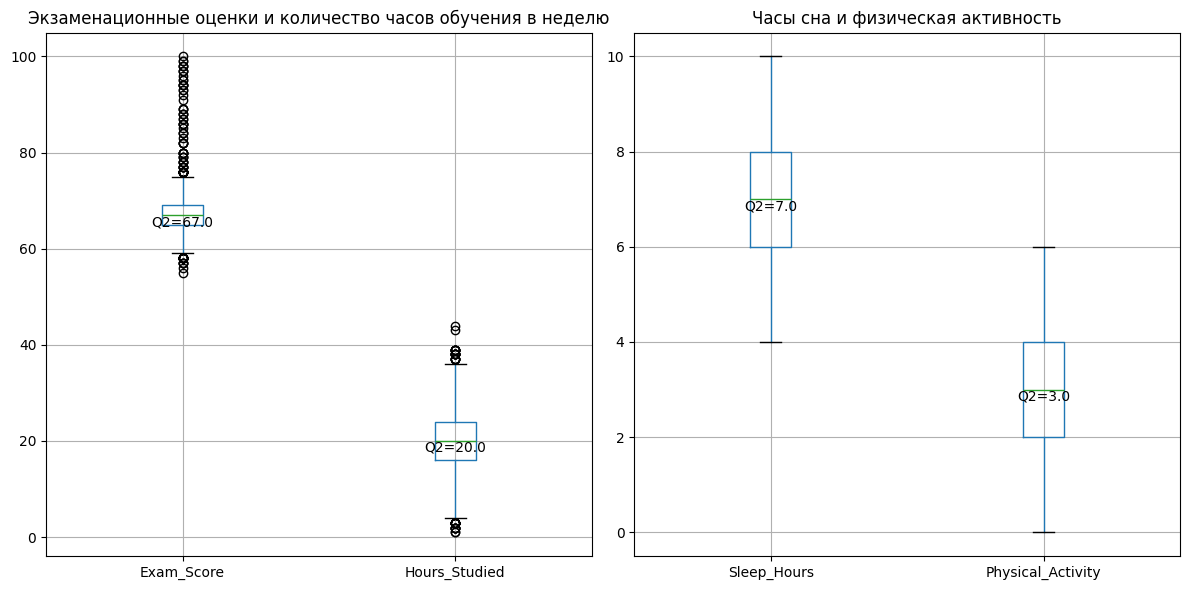

In [ ]:
from collections import Counter

# Настройка рисунка и создание subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Рисуем первый боксплот
boxplot1 = new_df.boxplot(column=['Exam_Score', 'Hours_Studied'], ax=axes[0])
axes[0].set_title('Экзаменационные оценки и количество часов обучения в неделю')

# Подсчет квартилей и IQR для первой группы данных
exam_scores = new_df['Exam_Score'].values
hours_studied = new_df['Hours_Studied'].values

q1_exam_score = np.percentile(exam_scores, 25)
median_exam_score = np.median(exam_scores)
q3_exam_score = np.percentile(exam_scores, 75)
iqr_exam_score = q3_exam_score - q1_exam_score

q1_hours_studied = np.percentile(hours_studied, 25)
median_hours_studied = np.median(hours_studied)
q3_hours_studied = np.percentile(hours_studied, 75)
iqr_hours_studied = q3_hours_studied - q1_hours_studied

# Аннотируем первую группу данных
axes[0].annotate(f'Q2={round(median_exam_score, 2)}', xy=(1, median_exam_score), ha='center', va='top')

axes[0].annotate(f'Q2={round(median_hours_studied, 2)}', xy=(2, median_hours_studied), ha='center', va='top')

# Рисуем второй боксплот
boxplot2 = new_df.boxplot(column=['Sleep_Hours', 'Physical_Activity'], ax=axes[1])
axes[1].set_title('Часы сна и физическая активность')

sleep_hours = new_df['Sleep_Hours'].values
physical_activity = new_df['Physical_Activity'].values

q1_sleep_hours = np.percentile(sleep_hours, 25)
median_sleep_hours = np.median(sleep_hours)
q3_sleep_hours = np.percentile(sleep_hours, 75)
iqr_sleep_hours = q3_sleep_hours - q1_sleep_hours

q1_physical_activity = np.percentile(physical_activity, 25)
median_physical_activity = np.median(physical_activity)
q3_physical_activity = np.percentile(physical_activity, 75)
iqr_physical_activity = q3_physical_activity - q1_physical_activity

# Аннотируем вторую группу данных
axes[1].annotate(f'Q2={round(median_sleep_hours, 2)}', xy=(1, median_sleep_hours), ha='center', va='top')

axes[1].annotate(f'Q2={round(median_physical_activity, 2)}', xy=(2, median_physical_activity), ha='center', va='top')

# Создание словаря с итоговыми показателями
results = {
    'Exam_Score': [q1_exam_score, median_exam_score, q3_exam_score, iqr_exam_score],
    'Hours_Studied': [q1_hours_studied, median_hours_studied, q3_hours_studied, iqr_hours_studied],
    'Sleep_Hours': [q1_sleep_hours, median_sleep_hours, q3_sleep_hours, iqr_sleep_hours],
    'Physical_Activity': [q1_physical_activity, median_physical_activity, q3_physical_activity, iqr_physical_activity]
}

# Преобразование словаря в DataFrame
df_results = pd.DataFrame(results, index=['Q1', 'Q2 (Median)', 'Q3', 'IQR'])

# Вывод таблицы
print(df_results)
print()

#  вывод моды для Exam_Score
def calculate_mode(scores):

    counts = Counter(scores)
    max_count = max(counts.values())
    modes = [num for num, count in counts.items() if count == max_count]

    if len(modes) > 1:
        return f"Набор бимодален/мультимодален: {modes}"
    elif len(modes) == 1:
        return f"Мода: {modes[0]}"
    else:
        return "Нет моды"

# Пример использования
result = calculate_mode(df['Exam_Score'])
print(result)
print()
plt.tight_layout()
plt.show()

По представленным данным можно сделать следующие выводы:



1.  **Экзаменационные баллы (Exam_Score)**
Средняя оценка учащихся близка к 67. Большинство учеников получили оценки в диапазоне от 65 до 69 баллов, что демонстрирует небольшую дисперсию оценок. Таким образом, студенты показали довольно однородные результаты на экзамене.
Небольшой межквартильный размах (IQR = 4) подтверждает низкую вариацию данных, то есть ученики демонстрировали близкие друг другу результаты.

2.   **Часы подготовки (Hours_Studied)**
Студенты в среднем занимались подготовкой в течение 20 часов. Однако существенный размах значений (от 16 до 24 часов) указывает на значительную разницу в затраченном времени на подготовку.
Высокий IQR (8 часов) подчеркивает значительный разброс времени, потраченного студентами на учебу. Некоторые уделяют гораздо меньше внимания подготовке, тогда как другие активно занимаются изучением материала.

3. **Сон (Sleep_Hours)**
Среднее число часов сна составляет 7 часов, что является оптимальным показателем для большинства взрослых. Показатели демонстрируют небольшие различия (IQR = 2 часа) — большинство студентов спят достаточно стабильно, несмотря на возможные индивидуальные колебания.

4. **Физическая активность (Physical_Activity)**
Средняя физическая активность составила 3 единицы измерения (предположительно, это занятия спортом или активные мероприятия). Наблюдается умеренный разброс физических нагрузок среди студентов.
Низкий IQR (2 единицы) означает, что учащиеся имеют схожий уровень активности.

**Общий вывод:**

Данные показывают высокую стабильность академических успехов и уровня сна, однако значительное различие наблюдается в количестве времени, которое студенты тратят на подготовку к экзаменам. Уровень физической активности также стабилен, что способствует поддержанию общего здоровья учащихся. Эти выводы позволяют предположить, что значительная доля успеха зависит от индивидуальных усилий и организации учебного процесса, а не только от количества времени, проведенного за учебниками.

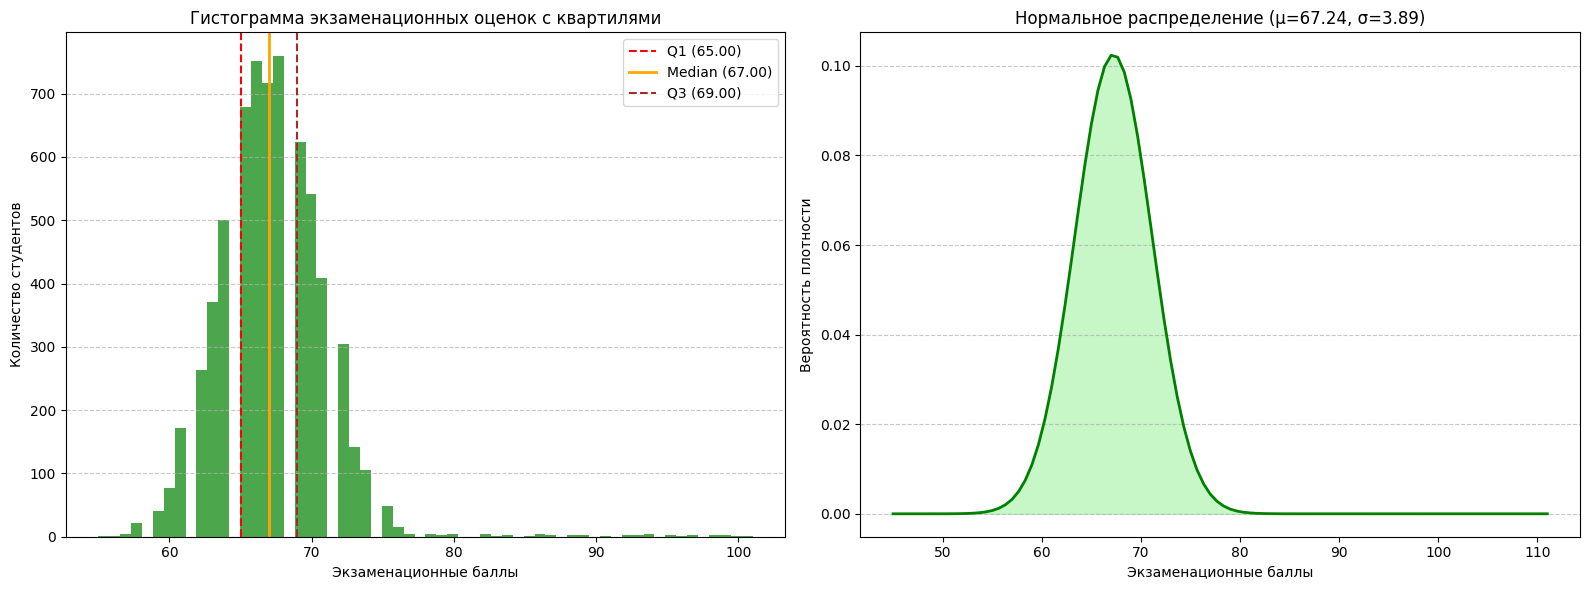

Q1: 65.00
Median: 67.00
Q3: 69.00
IQR: 4.00


In [ ]:
from scipy.stats import norm
# Группировка данных и расчет квартилей
q1 = df['Exam_Score'].quantile(0.25)
median = df['Exam_Score'].quantile(0.5)
q3 = df['Exam_Score'].quantile(0.75)
iqr = q3 - q1

# Создание общего окна с двумя графиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))  # Создаем две панели

# Первый график: гистограмма с квартилями
axes[0].hist(df['Exam_Score'], bins=60, color='green', alpha=0.7)
axes[0].axvline(q1, color='red', linestyle='--', label=f'Q1 ({q1:.2f})')
axes[0].axvline(median, color='orange', linestyle='-', linewidth=2, label=f'Median ({median:.2f})')
axes[0].axvline(q3, color='brown', linestyle='--', label=f'Q3 ({q3:.2f})')
axes[0].legend(loc="upper right")
axes[0].set_title('Гистограмма экзаменационных оценок с квартилями')
axes[0].set_xlabel('Экзаменационные баллы')
axes[0].set_ylabel('Количество студентов')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Второй график: нормальное распределение
mu = np.mean(df['Exam_Score'])
sigma = np.std(df['Exam_Score'])
x = np.linspace(np.min(df['Exam_Score']) - 10, np.max(df['Exam_Score']) + 10, 100)
probs = norm.pdf(x, mu, sigma)

axes[1].plot(x, probs, color='green', linewidth=2)
axes[1].fill_between(x, probs, color='lightgreen', alpha=0.5)
axes[1].set_title(f'Нормальное распределение (μ={mu:.2f}, σ={sigma:.2f})')
axes[1].set_xlabel('Экзаменационные баллы')
axes[1].set_ylabel('Вероятность плотности')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Отобразить графики
plt.tight_layout()  # Для лучшего расположения элементов
plt.show()

# Печать квартилей и IQR
print(f"Q1: {q1:.2f}")
print(f"Median: {median:.2f}")
print(f"Q3: {q3:.2f}")
print(f"IQR: {iqr:.2f}")

Q1 (нижний квартиль, 25% студентов) получил оценки ниже или равные 65.

Q2 (медиана, 50% студентов) набрал ровно 67 балла.

Q3 (верхний квартиль, 75% студентов) имеет оценки менее или равные 69.

IQR (интерквартильный размах) равен 4.00, что характеризует малую дисперсию оценок в середине выборки.

Нормальное распределение Экзаменационных баллов ("Exam_Score"): μ = 67.23, а σ = 3,86

**Основные наблюдения:**
Маленькая вариация оценок: Очень маленький IQR (всего 4 пункта) говорит о том, что **средний уровень успеваемости среди студентов практически одинаковый**. Небольшая разница в оценках указывает на высокий уровень однородности учебных достижений.
Нормальное распределение: Гистограмма показывает, что оценки сосредоточены вблизи среднего значения, что характерно для нормального распределения. Это означает, что учебный материал усвоен большинством студентов равномерно хорошо.


**Оценка влияния родителей на экзаменационные оценки**

In [ ]:
import plotly.express as px
Parental_Involvement = new_df['Parental_Involvement'].value_counts()

# Create the pie chart
fig = px.pie(Parental_Involvement,
             values=Parental_Involvement.values,
             names=Parental_Involvement.index,
             title='Вовлеченность родителей',
             hole=0.1)

# Update chart layout
fig.update_traces(textinfo='percent+label', pull=[0.05, 0.05], showlegend=False)

fig.update_layout(font_size=20,
                  height=600,
                  width=800,
                  title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top'),
                  paper_bgcolor='white',
                  plot_bgcolor='#CAF1DE')

# Show the plot
fig.show()

# Группа по Parental_Involvement и получение статистики
stats = new_df.groupby('Parental_Involvement')['Exam_Score'].agg(['count', 'min', 'max', 'mean'])

# Просмотр статистики для групп high и middle
print(stats.loc[['High', 'Medium', 'Low']])


                      count  min  max       mean
Parental_Involvement                            
High                   1908   57  100  68.092767
Medium                 3361   55   97  67.090747
Low                    1336   56   98  66.332335


У 50% студентов родители оказывают средную вовлеченность, 28.9 % - высокую вовлеченность. Можно предположить о влиянии этих родителей на высокие оценки их детей. Проверим эту гипотезу и вычислим показатели баллов: средний, максимальный и минимальный в разрезе уровня вовлеченности родителе.

Студенты, чьи родители имею высокий уровень вовлеченности, имеют **минимальные экзаменационные баллы на 1% выше студентов**, чьи родители оказывают средную вовлеченность и **на 2% выше**, чем у студентов, чьи родители низко вовлечены в обучение студентов.

По максимальным экзаменационным баллам также заметно влияние вовлеченности родителей:
**На 2% у студентов с высокой вовлеченностью родителей** выше баллы за экзамен, чем у студентов с низкой вовлеченностью родителей.
**На 3% у студентов с высокой вовлеченностью родителей** выше баллы за экзамен, чем у студентов со средней вовлеченностью родителей.

Таким образом, вовлеченность родителей в образование детей влияет на их оценки за экзамены.


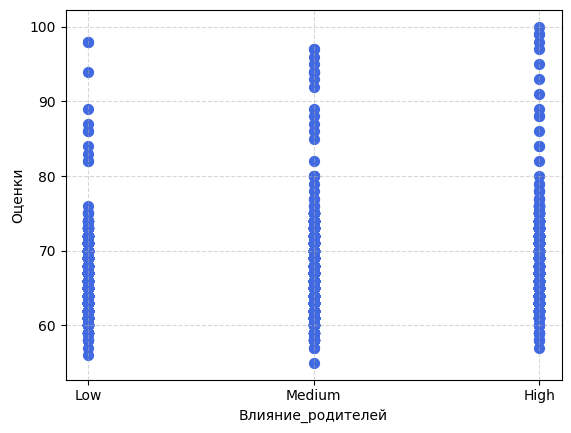

In [ ]:
import matplotlib.pyplot as plt

# Пример данных
hours_studied = new_df['Parental_Involvement']
exam_scores = new_df['Exam_Score']

# Scatter plot
plt.scatter(hours_studied, exam_scores, color='royalblue', s=50)

# Оформление
#plt.title('Scatter plot: Экзаменационные баллы vs Часы подготовки')
plt.xlabel('Влияние_родителей')
plt.ylabel('Оценки')
plt.grid(linestyle='--', alpha=0.5)

# Отображение графика
plt.show()

In [ ]:
new_df['Exam_Score'].mean()

np.float64(67.22679788039365)

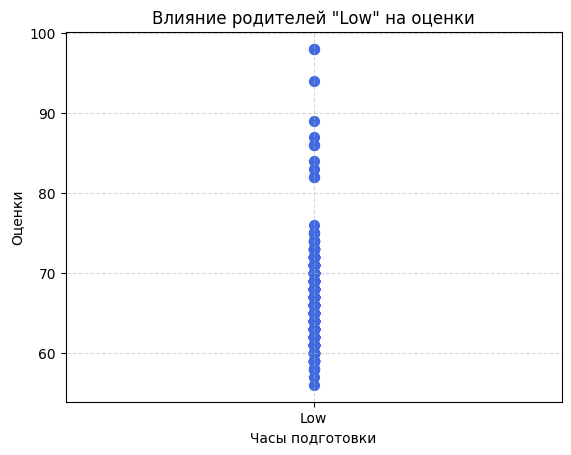

In [ ]:
import matplotlib.pyplot as plt

# Выбор данных для тех, у кого уровень родительской вовлеченности 'Low'
low_parent_involvement_students = new_df[new_df['Parental_Involvement'] == 'Low']

# Извлечение нужных столбцов
involvement_low = low_parent_involvement_students['Parental_Involvement']  # выберите нужный столбец вместо 'Hours_Studied'
exam_scores_low = low_parent_involvement_students['Exam_Score']

# Scatter plot
plt.scatter(involvement_low, exam_scores_low, color='royalblue', s=50)

# Оформление
plt.title('Влияние родителей "Low" на оценки')
plt.xlabel('Часы подготовки')
plt.ylabel('Оценки')
plt.grid(linestyle='--', alpha=0.5)

# Отображение графика
plt.show()

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from plotly.colors import qualitative  # Импортируем качественные палитры

# Предварительно меняем значения в столбце Parental_Education_Level
new_df['Parental_Education_Level'] = new_df['Parental_Education_Level'].replace({
    'College': 'Колледж',
    'High School': 'Средняя школа',
    'Postgraduate': 'Аспирантура',
    'others': 'Нет данных'
})

# Предварительный расчет агрегации
total_students = len(new_df)
avg_total_score = round(new_df['Exam_Score'].mean(), 2)

# Средние экзаменационные баллы по уровню образования родителей
parent_education_group = new_df.groupby('Parental_Education_Level').agg({
    'Exam_Score': 'mean',
    'Parental_Education_Level': lambda x: len(x)
}).rename(columns={'Parental_Education_Level': 'Student_Count'}).reset_index()

# Используем качественную палитру Plotly
colors_pal = qualitative.D3  # Качественная палитра из Plotly (светлые яркие цвета)

# Преобразуем данные в удобный формат для sunburst-диаграммы
labels = []
parents = []
values = []
colors = []

# Центральный кружок (root level)
labels.append(f"Всего:\n{total_students}")
parents.append("")
values.append(total_students)
colors.append("#EFEFFB")  # Светлый синий фон центрального кружка

# Предварительный расчет долей
parent_education_group['Percentage'] = parent_education_group['Student_Count'] / total_students * 100

# Средний уровень: образование родителей
for idx, row in parent_education_group.iterrows():
    labels.append(f"{row.Parental_Education_Level} ({row.Percentage:.1f}%)")
    parents.append(labels[0])
    values.append(row.Student_Count)
    colors.append(colors_pal[(idx + 1) % len(colors_pal)])

# Нижний уровень: средний балл по каждому уровню образования
for idx, row in parent_education_group.iterrows():
    labels.append(f"Средний балл {row.Exam_Score:.2f}")
    parents.append(f"{row.Parental_Education_Level} ({row.Percentage:.1f}%)")
    values.append(row.Student_Count)
    colors.append(colors_pal[(idx + 1) % len(colors_pal)])

# Создаем объект sunburst
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    hovertemplate='%{label}<extra></extra>',
    marker=dict(colors=colors),
))

# Увеличим размер шрифта центрального кружка и остальных элементов
central_node_font_size = 20
other_nodes_font_size = 15

fig.update_traces(textfont=dict(
    family='Arial',  # Можно поменять семейство шрифта
    color='black',  #
    size=15
))

# Установка размеров окна графика
fig.update_layout(width=800, height=600, title_text="Образование родителей и средний балл студентов", font_color="black", title_x=0.5)

# Отображение графика
fig.show()

print(parent_education_group)

  Parental_Education_Level  Exam_Score  Student_Count  Percentage
0              Аспирантура   67.970881           1305   19.757759
1                  Колледж   67.303320           1988   30.098410
2               Нет данных   67.055556             90    1.362604
3            Средняя школа   66.882992           3222   48.781226


**У 19,7 % студентов, чьи родители закончили аспиратнуру, наблюдаются самые высокие средние баллы - 67,97 %** в отличие от всех остальных студентов.

Также **выше баллы у студентов, чьи родители окончили колледж (30 %) = 67, 3 средний балл за экзамен**.

Таким образом наблюдается прямая зависимость получения более высоких оценов у студентов, чьи родители имеют дополнительное образование помимо школьного образования.

Причиной могут быть как вовлеченность родителей в образование детей, так как они сами высоко ценят значимость образования, так и высокий контроль обучения своих детей.


**Гендерные различия по обучению и оценкам**

In [ ]:
df_type_Gender = new_df.groupby('Gender').agg(
    {'Exam_Score': ['count', 'mean', 'max', 'min'],
     'Hours_Studied': ['count', 'mean', 'max', 'min'],
     'Attendance': ['count', 'mean', 'max', 'min'],
     'Physical_Activity': ['count', 'mean', 'max', 'min'],
     'Tutoring_Sessions': ['count', 'mean', 'max', 'min'],
     }
)
# Просмотр результирующего DataFrame
df_type_Gender

Exam_Score                     Hours_Studied                     \
            count       mean  max min         count       mean max min   
Gender                                                                   
Female       2792  67.232808  100  57          2792  20.002507  44   1   
Male         3813  67.222397   99  55          3813  19.958563  39   1   

       Attendance                     Physical_Activity                    \
            count       mean  max min             count      mean max min   
Gender                                                                      
Female       2792  79.862464  100  60              2792  2.961318   6   0   
Male         3813  80.054812  100  60              3813  2.972463   6   0   

       Tutoring_Sessions                    
                   count      mean max min  
Gender                                      
Female              2792  1.502149   7   0  
Male                3813  1.486231   8   0

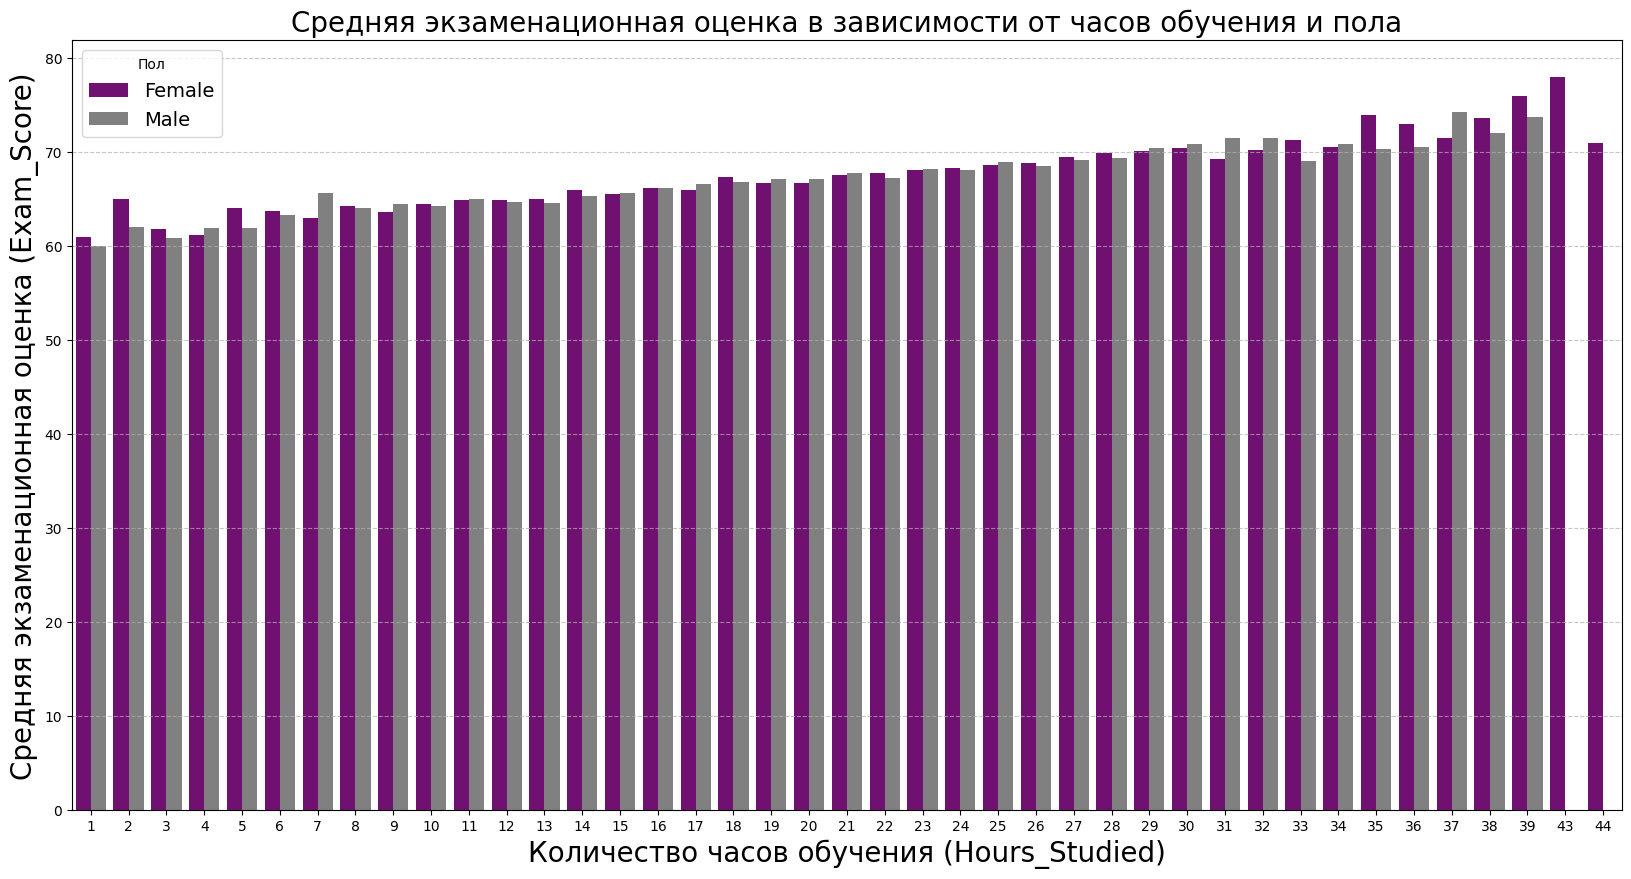

       Hours_Studied                    Exam_Score                    
               count       mean max min      count       mean  max min
Gender                                                                
Female          2792  20.002507  44   1       2792  67.232808  100  57
Male            3813  19.958563  39   1       3813  67.222397   99  55


In [ ]:
# Подготовим агрегированные данные (среднюю оценку по количеству часов обучения и полу)
grouped_data = new_df.groupby(['Hours_Studied', 'Gender'])['Exam_Score'].mean().reset_index()

# Строим столбчатую диаграмму
plt.figure(figsize=(20, 10))  # Устанавливаем размеры графика
bar_plot = sns.barplot(data=grouped_data, x='Hours_Studied', y='Exam_Score', hue='Gender', palette={'Male':'grey', 'Female':'purple'})

# Заголовок и подписи осей с большим размером шрифта
plt.title('Средняя экзаменационная оценка в зависимости от часов обучения и пола', fontsize=20)
plt.xlabel('Количество часов обучения (Hours_Studied)', fontsize=20)
plt.ylabel('Средняя экзаменационная оценка (Exam_Score)', fontsize=20)

# Легенда для разделения по полу
plt.legend(title='Пол', loc='upper left', fontsize=14)

# Отображаем график
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Агрегированная статистика по Gender и Hours_Studied
df_type_Gender_Hours_Studied = new_df.groupby(['Gender']).agg({
    'Hours_Studied': ['count', 'mean', 'max', 'min'],
    'Exam_Score': ['count', 'mean', 'max', 'min']})

print(df_type_Gender_Hours_Studied)

По резальтутам сравнение оценок в разрезе половой принадлежности, **женщины опережают на 1 % по максимальным баллам и на 2% по минимальным баллам** за экзамены. Основной причиной может быть **разница** в том, что студенты женского пола **больше занимаются, чем студенты мужского пола**:
Так например, студенты женского пола в среднем обучаются 20ч в неделю, самое максимальное - 44ч,
тогда как студенты мужского пола в среднем обучаются в неделю 19,95 ч., а самое большее - 39ч.

**Оценка влияния типа учебного заведения**

In [ ]:
df_type_school_type = new_df.groupby('School_Type').agg(
    {'Exam_Score': ['count', 'mean', 'max', 'min'],
     'Hours_Studied': ['count', 'mean', 'max', 'min'],
     'Attendance': ['count', 'mean', 'max', 'min'],
     'Physical_Activity': ['count', 'mean', 'max', 'min'],
     'Tutoring_Sessions': ['count', 'mean', 'max', 'min'],
     }
)

# Просмотр результирующего DataFrame
df_type_school_type

Exam_Score                     Hours_Studied                     \
                 count       mean  max min         count       mean max min   
School_Type                                                                   
Private           2008  67.275398  100  56          2008  19.982072  44   2   
Public            4597  67.205569   99  55          4597  19.974984  43   1   

            Attendance                     Physical_Activity                \
                 count       mean  max min             count      mean max   
School_Type                                                                  
Private           2008  80.299303  100  60              2008  2.983566   6   
Public            4597  79.831194  100  60              4597  2.960844   6   

                Tutoring_Sessions                    
            min             count      mean max min  
School_Type                                          
Private       0              2008  1.477590   7   0  
Public        0              4597  1.499674   8   0

            Attendance                     Exam_Score                    
                 count       mean  max min      count       mean  max min
School_Type                                                              
Private           2008  80.299303  100  60       2008  67.275398  100  56
Public            4597  79.831194  100  60       4597  67.205569   99  55



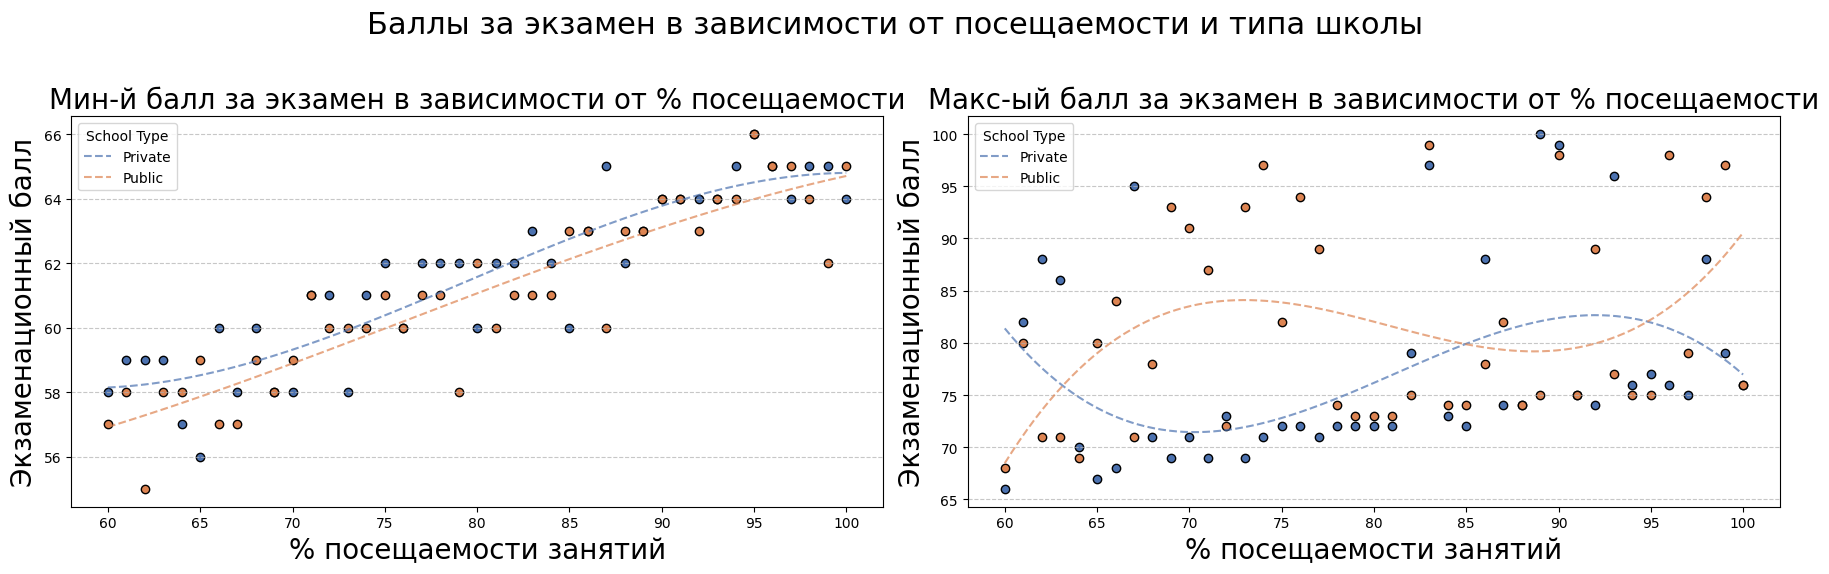

In [ ]:
# Группируем данные по School_Type и Attendance (минимальный балл)
grouped_data_min = new_df.groupby(['Attendance', 'School_Type'])['Exam_Score'].min().reset_index()

# Группируем данные по School_Type и Attendance (максимальный балл)
grouped_data_max = new_df.groupby(['Attendance', 'School_Type'])['Exam_Score'].max().reset_index()

# Агрегированная статистика по School_Type
df_type_school_type_Attendance = new_df.groupby(['School_Type']).agg({'Attendance': ['count', 'mean', 'max', 'min'],
                                                                      'Exam_Score': ['count', 'mean', 'max', 'min']
                                                                      })
print(df_type_school_type_Attendance)

# Палитра для окрашивания трендов и точек
palette = sns.color_palette('deep', n_colors=len(grouped_data_max['School_Type'].unique()))

# Два графика рядом (subplots)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Минимальная оценка (левый график)
for idx, school_type in enumerate(grouped_data_min['School_Type'].unique()):
    subset = grouped_data_min[grouped_data_min['School_Type'] == school_type]
    z = np.polyfit(subset['Attendance'], subset['Exam_Score'], deg=3)
    p = np.poly1d(z)
    att_range = np.linspace(subset['Attendance'].min(), subset['Attendance'].max(), 100)
    exam_smooth = p(att_range)

    # Линия тренда
    axes[0].plot(att_range, exam_smooth, color=palette[idx], ls='--', alpha=0.7, label=f'{school_type}')

    # Точки данных
    axes[0].scatter(subset['Attendance'], subset['Exam_Score'], color=palette[idx], marker='o', edgecolor='black')

# Форматирование минимального балла
axes[0].set_title('Мин-й балл за экзамен в зависимости от % посещаемости', fontsize=20)
axes[0].set_xlabel('% посещаемости занятий', fontsize=20)
axes[0].set_ylabel('Экзаменационный балл', fontsize=20)

# Легенда для первого графика
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, title='School Type', loc='best')

# Максимальная оценка (правый график)
for idx, school_type in enumerate(grouped_data_max['School_Type'].unique()):
    subset = grouped_data_max[grouped_data_max['School_Type'] == school_type]
    z = np.polyfit(subset['Attendance'], subset['Exam_Score'], deg=3)
    p = np.poly1d(z)
    att_range = np.linspace(subset['Attendance'].min(), subset['Attendance'].max(), 100)
    exam_smooth = p(att_range)

    # Линия тренда
    axes[1].plot(att_range, exam_smooth, color=palette[idx], ls='--', alpha=0.7, label=f'{school_type}')

    # Точки данных
    axes[1].scatter(subset['Attendance'], subset['Exam_Score'], color=palette[idx], marker='o', edgecolor='black')

# Форматирование максимального балла
axes[1].set_title('Макс-ый балл за экзамен в зависимости от % посещаемости', fontsize=20)
axes[1].set_xlabel('% посещаемости занятий', fontsize=20)
axes[1].set_ylabel('Экзаменационный балл', fontsize=20)

# Легенда для второго графика
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='School Type', loc='best')

# Легкость чтения графика
axes[0].legend(title='School Type', loc='best')
axes[1].legend(title='School Type', loc='best')
print()
# Общая настройка
plt.suptitle('Баллы за экзамен в зависимости от посещаемости и типа школы', fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Оставляем пространство для основного заголовка
# настраиваем сеточку для каждого графика
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



Средние значения посещаемости
В рамках линии тренда наглядно видно, что при одинаковой посещаемости учебного заведения **минимальный балл за экзамен у студентов частного образовательного учреждения выше**.

При этом **максимальные баллы за экзамен в общеобразовательных гос учреждениях значительно выше**. В связи с этим, можно предположить, что частные заведения особенно положительно могут повлиять на студентов с низкой успеваемостью и низкой обучаемостью, для того, чтобы подтянуть из знания.

В обоих случаях наблюдается прямая зависимость от посещения занятий: чем выше % посещения занятий, тем выше минимальный и максимальный баллы за экзамен. Тем не менее, в частных учебных заведениях при посещаемости от 68 % до ~ 82% наблюдается сильное снижение максимальных баллов, в отличие от государствонных образовательных учреждений


**Учащиеся частных школ демонстрируют более высокую посещаемость занятий** (
80.3% против 79.8 %), а также стабильно превосходят учащихся государственных учебных заведений по результатам экзаменационных оценок. **Средний балл учеников частных школ достигает отметки в 67.3, тогда как государственные школы показывают среднее значение лишь чуть ниже — 67.2.**

Причем наиболее ярко выраженная разница проявляется именно среди минимальных баллов: минимальный балл частного сектора составляет 56, тогда как государственный сектор демонстрирует минимальное значение в 55.

**Таким образом, частные учебные заведения обеспечивают более стабильные показатели успеваемости даже среди слабых студентов.**

Эти факты могут свидетельствовать о ряде факторов, влияющих на академический успех:

1. Частные школы чаще имеют меньшие классы, что позволяет уделять больше внимания  каждому ученику.
2. Качество преподавательского состава зачастую отличается большей квалификацией и мотивацией в частном секторе.
3. Большее внимание уделяется индивидуальной работе с учениками, что способствует повышению общей успеваемости.
4. Дополнительные образовательные программы и условия создают благоприятную среду для достижения высоких результатов.

Таким образом, представленные статистические данные позволяют сделать вывод о преимуществах системы образования в частных школах, способствующих улучшению показателей посещаемости и качества усвоения материала учащимися.

            Exam_Score                    
                 count       mean  max min
School_Type                               
Private           2008  67.275398  100  56
Public            4597  67.205569   99  55


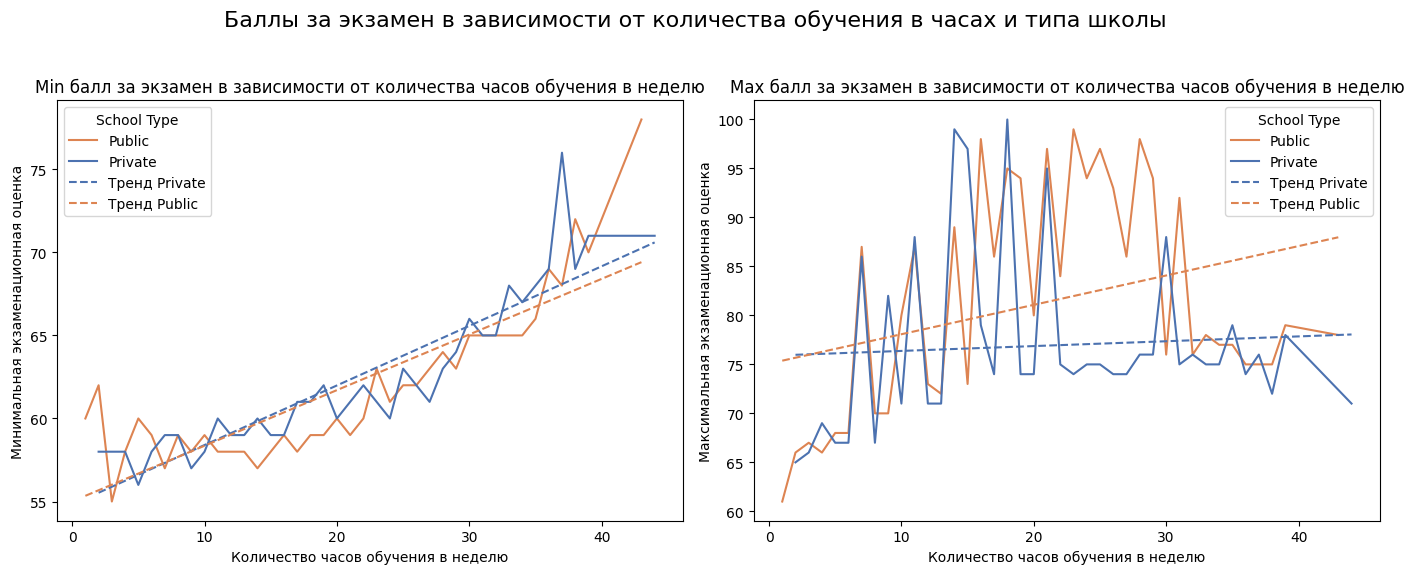

In [ ]:
# Группируем данные по количеству часов учебы и типу школы
grouped_data_min = new_df.groupby(['Hours_Studied', 'School_Type'])['Exam_Score'].min().reset_index()
grouped_data_max = new_df.groupby(['Hours_Studied', 'School_Type'])['Exam_Score'].max().reset_index()

# Получаем уникальные типы школ
unique_school_types = sorted(grouped_data_min['School_Type'].unique())  # Сохраняем сортировку для надежности

# Создаем фиксированную палитру для каждого типа школы
palette = dict(zip(unique_school_types, sns.color_palette('deep', n_colors=len(unique_school_types))))

# Графики минимальной и максимальной оценки
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Первая часть: минимальная оценка
sns.lineplot(x="Hours_Studied", y="Exam_Score", hue="School_Type", data=grouped_data_min, ax=axes[0], palette=palette)
axes[0].set_title('Min балл за экзамен в зависимости от количества часов обучения в неделю')
axes[0].set_xlabel('Количество часов обучения в неделю')
axes[0].set_ylabel('Минимальная экзаменационная оценка')

# Добавляем линии тренда для минимума
for school_type in unique_school_types:
    subset = grouped_data_min[grouped_data_min['School_Type'] == school_type]
    if len(subset) >= 2:
        z = np.polyfit(subset['Hours_Studied'], subset['Exam_Score'], deg=1)
        p = np.poly1d(z)
        hours_range = np.linspace(subset['Hours_Studied'].min(), subset['Hours_Studied'].max(), num=len(subset))
        axes[0].plot(hours_range, p(hours_range), '--', label=f'Тренд {school_type}', color=palette[school_type])

# Вторая часть: максимальная оценка
sns.lineplot(x="Hours_Studied", y="Exam_Score", hue="School_Type", data=grouped_data_max, ax=axes[1], palette=palette)
axes[1].set_title('Max балл за экзамен в зависимости от количества часов обучения в неделю')
axes[1].set_xlabel('Количество часов обучения в неделю')
axes[1].set_ylabel('Максимальная экзаменационная оценка')

# Добавляем линии тренда для максимума
for school_type in unique_school_types:
    subset = grouped_data_max[grouped_data_max['School_Type'] == school_type]
    if len(subset) >= 2:
        z = np.polyfit(subset['Hours_Studied'], subset['Exam_Score'], deg=1)
        p = np.poly1d(z)
        hours_range = np.linspace(subset['Hours_Studied'].min(), subset['Hours_Studied'].max(), num=len(subset))
        axes[1].plot(hours_range, p(hours_range), '--', label=f'Тренд {school_type}', color=palette[school_type])

# Легкость чтения графика
axes[0].legend(title='School Type', loc='best')
axes[1].legend(title='School Type', loc='best')

# Агрегированная статистика по School_Type
df_type_school_type = new_df.groupby(['School_Type']).agg({'Exam_Score': ['count', 'mean', 'max', 'min']})
print(df_type_school_type)

# Общая настройка
plt.suptitle('Баллы за экзамен в зависимости от количества обучения в часах и типа школы', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Оставляем пространство для основного заголовка
plt.show()

При аналите минимальных баллов за экзамен в разбивке учреждений на частные и бюджетные, получаем результат, что линия тренда публичной и частной школы не имеет большой разницы, если заниматься от 2 до 20 ч в неделю.
Это может означать, что начальная подготовка примерно одинакова вне зависимости от статуса школы. Возможно, базовые знания успешно усваиваются всеми студентами независимо от условий учебы.

Также на графике наглядно можно увидеть, что при занятии от 20ч в неделю частная школа идет в отрыв по росту минимальных баллов за экзамены.
Вероятно, дополнительные часы в частных заведениях используются более эффективно благодаря лучшему качеству преподавания, индивидуальным занятиям или повышенной мотивации самих учеников

При анализе максимальных баллов за экзамены, при анализе линии тренда можно обратить внимание, что количество часов обучения в неделю не сильно сказывается на рост баллов, а в государственном учебном заведении идет значительный рост максимальных баллов при большем обучении.

**Возможные причины:**

1.   Качество Преподавания: В частных школах преподаватели часто обладают высоким уровнем квалификации и применяют современные методики обучения. Индивидуальное внимание помогает преодолеть трудности даже слабым студентам, обеспечивая устойчивый рост минимальных результатов.

2. Материально-Техническая Оснащенность: Частные школы нередко располагают лучшими учебными ресурсами, включая современное оборудование и доступ к дополнительным материалам. Эти факторы облегчают освоение сложного материала и повышают эффективность занятий.


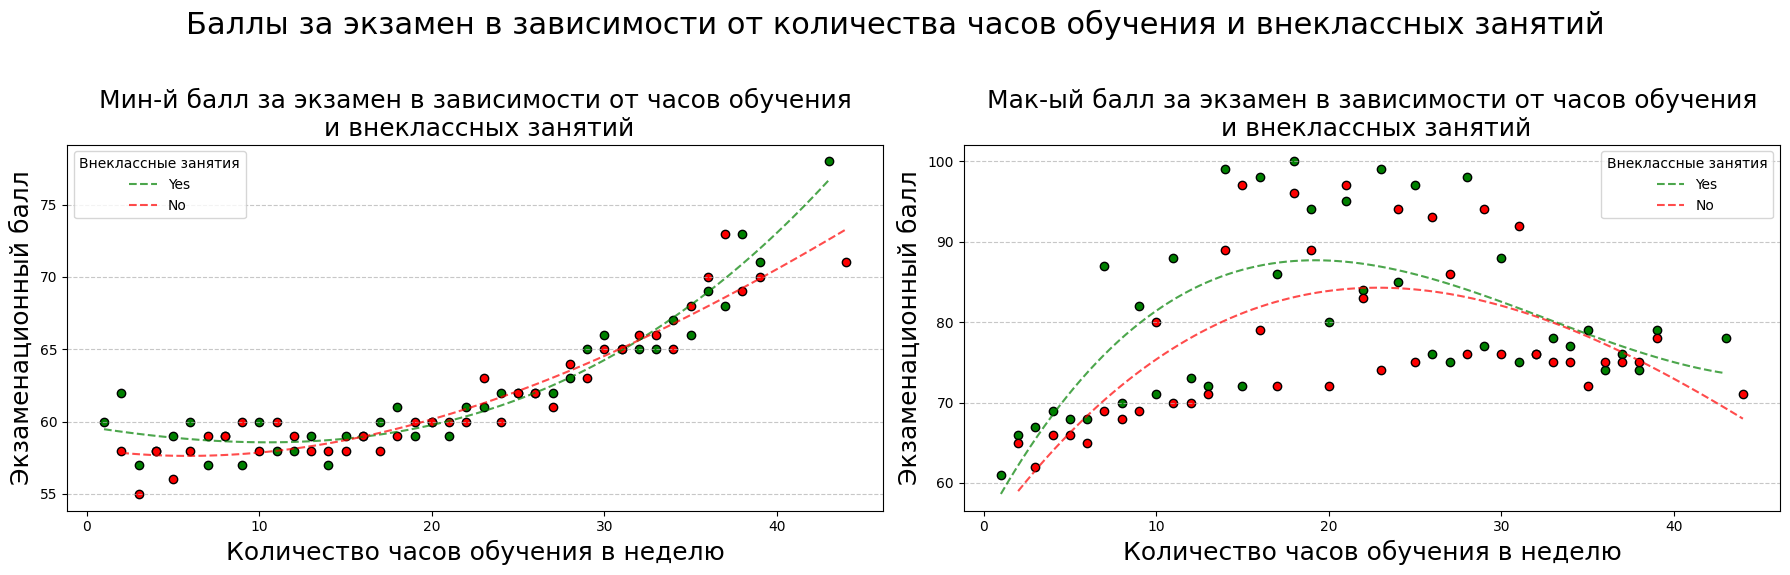

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные загружаются заранее (new_df - ваш DataFrame)

# Цветовая палитра
color_map = {
    'Yes': 'green',
    'No': 'red'
}

# Группируем данные по Hours_Studied и Extracurricular_Activities (минимальный балл)
grouped_data_min_activ = new_df.groupby(['Hours_Studied', 'Extracurricular_Activities'])['Exam_Score'].min().reset_index()

# Группируем данные по Hours_Studied и Extracurricular_Activities (максимальный балл)
grouped_data_max_activ = new_df.groupby(['Hours_Studied', 'Extracurricular_Activities'])['Exam_Score'].max().reset_index()

# Двухпанельный график
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Левый график: минимальный балл
for value in grouped_data_min_activ['Extracurricular_Activities'].unique():
    subset = grouped_data_min_activ[grouped_data_min_activ['Extracurricular_Activities'] == value]
    z = np.polyfit(subset['Hours_Studied'], subset['Exam_Score'], deg=3)
    p = np.poly1d(z)
    att_range = np.linspace(subset['Hours_Studied'].min(), subset['Hours_Studied'].max(), 100)
    exam_smooth = p(att_range)

    # Линия тренда
    axes[0].plot(att_range, exam_smooth, color=color_map[value], ls='--', alpha=0.7, label=value)

    # Точки данных
    axes[0].scatter(subset['Hours_Studied'], subset['Exam_Score'], color=color_map[value], marker='o', edgecolor='black')

# Подписываем первый график
axes[0].set_title('Мин-й балл за экзамен в зависимости от часов обучения\n и внеклассных занятий', fontsize=18)
axes[0].set_xlabel('Количество часов обучения в неделю', fontsize=18)
axes[0].set_ylabel('Экзаменационный балл', fontsize=18)
axes[0].legend(title='Внеклассные занятия', loc='best')

# Правый график: максимальный балл
for value in grouped_data_max_activ['Extracurricular_Activities'].unique():
    subset = grouped_data_max_activ[grouped_data_max_activ['Extracurricular_Activities'] == value]
    z = np.polyfit(subset['Hours_Studied'], subset['Exam_Score'], deg=3)
    p = np.poly1d(z)
    att_range = np.linspace(subset['Hours_Studied'].min(), subset['Hours_Studied'].max(), 100)
    exam_smooth = p(att_range)

    # Линия тренда
    axes[1].plot(att_range, exam_smooth, color=color_map[value], ls='--', alpha=0.7, label=value)

    # Точки данных
    axes[1].scatter(subset['Hours_Studied'], subset['Exam_Score'], color=color_map[value], marker='o', edgecolor='black')

# Подписываем второй график
axes[1].set_title('Мак-ый балл за экзамен в зависимости от часов обучения\n и внеклассных занятий', fontsize=18)
axes[1].set_xlabel('Количество часов обучения в неделю', fontsize=18)
axes[1].set_ylabel('Экзаменационный балл', fontsize=18)
axes[1].legend(title='Внеклассные занятия', loc='best')

# Общий заголовок
plt.suptitle('Баллы за экзамен в зависимости от количества часов обучения и внеклассных занятий', fontsize=22)

# Убираем лишнее пространство вокруг графиков
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# настраиваем сеточку для каждого графика
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Показываем итоговый график
plt.show()

При анализе линии тренда ярко видно:

**Студенты при количестве часов обучения от 15 до 32 не имеют особого преимущества** от внеклассных занятий при минимальных оценках за экзамен.
Но ярко видно **влияние внеклассных занятий при меньшем количестве часов обучения (менее 15ч)**, в связи с этим можно предположить, что именно благодаря дополнительным внеклассным занятиям студентам получается повысить минимальный балл за экзамен, в сравнении с теми, кто не посещает внеклассные занятия.

При этом, более сильный отрыв виден у студентов с максимальными баллами за экзамен при количестве обучения от 0 до 32 (в неделю). Здесь влияние внеклассных занятий на максимальный балл в разы заметнее

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Агрегация данных по количеству занятий с репетитором
df_type_Tutoring_Sessions = new_df.groupby(['Tutoring_Sessions']).agg({
    'Exam_Score': ['mean', 'max', 'min']
})

# Преобразуем MultiIndex в плоские имена столбцов
df_type_Tutoring_Sessions.columns = [' '.join(col).strip() for col in df_type_Tutoring_Sessions.columns.values]

# Возвращаем индекс обратно в столбец
df_type_Tutoring_Sessions.reset_index(inplace=True)

# Создаем пустой график
fig = go.Figure()

# Добавляем первую линию для среднего балла (синяя линия)
fig.add_trace(go.Scatter(
    x=df_type_Tutoring_Sessions['Tutoring_Sessions'],
    y=df_type_Tutoring_Sessions['Exam_Score mean'],
    mode='lines+markers',
    name='Средний балл',
    line_shape='spline',
    line=dict(color='blue', width=2),
    marker=dict(size=8),
    hovertemplate='Количество занятий: %{x}<br>Средний балл: %{y}',
))

# Добавляем вторую линию для максимального балла (зелёная линия)
fig.add_trace(go.Scatter(
    x=df_type_Tutoring_Sessions['Tutoring_Sessions'],
    y=df_type_Tutoring_Sessions['Exam_Score max'],
    mode='lines+markers',
    name='Максимальный балл',
    line_shape='spline',
    line=dict(color='green', width=2),
    marker=dict(size=8),
    hovertemplate='Количество занятий: %{x}<br>Максимальный балл: %{y}',
))

# Добавляем третью линию для минимального балла (красная линия)
fig.add_trace(go.Scatter(
    x=df_type_Tutoring_Sessions['Tutoring_Sessions'],
    y=df_type_Tutoring_Sessions['Exam_Score min'],
    mode='lines+markers',
    name='Минимальный балл',
    line_shape='spline',
    line=dict(color='red', width=2),
    marker=dict(size=8),
    hovertemplate='Количество занятий: %{x}<br>Минимальный балл: %{y}',
))

# Устанавливаем оформление графика
fig.update_layout(
    title_text='Зависимость экзаменационных баллов от количества занятий с репетитором',
    title_x=0.5,  # Центрирование заголовка
    xaxis_title='Количество занятий с репетитором',
    yaxis_title='Экзаменационные баллы',
    template='plotly_white',  # Чистый белый фон
    margin=dict(l=50, r=50, t=50, b=50),  # Границы графика
    legend_orientation="h",  # Легенда горизонтальна
    legend_y=-0.2,  # Легенда внизу
    font=dict(size=14)  # Размер шрифта
)

# Выводим график
fig.show()

# Выводим таблицу с красивыми настройками ширины экрана
with pd.option_context('display.width', None):
    print(df_type_Tutoring_Sessions)

   Tutoring_Sessions  Exam_Score mean  Exam_Score max  Exam_Score min
0                  0        66.489755              98              56
1                  1        66.980266              99              55
2                  2        67.567010              98              58
3                  3        67.865868             100              58
4                  4        68.229236              99              59
5                  5        68.754902              77              60
6                  6        71.666667              78              64
7                  7        69.857143              75              63
8                  8        69.000000              69              69


**Дополнительные занятия с репетиром действительно повышают средний балл за экзамен, но в основном за счет повышения минимальных экзаменационных результатов**. Это может быть связано с тем, что студенты с низкой успеваюемость активнее прибегают к услгуам репетиторов, что действительно помогает повысить оценки за экзамен. Тогда как получение максимального балла не зависит от дополнительных занятий с репетитором.

In [ ]:
df_teacher_quality = new_df.groupby(['Teacher_Quality']).agg({'Exam_Score' : ['count', 'mean', 'max', 'min']})
df_teacher_quality

Exam_Score                    
                     count       mean  max min
Teacher_Quality                               
High                  1946  67.659815   98  58
Low                    657  66.753425   94  58
Medium                3924  67.102956  100  55
others                  78  66.641026   73  58

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Агрегация данных по квалификации преподавателя
df_type_Teacher_Quality = new_df.groupby(['Teacher_Quality']).agg({
    'Exam_Score': ['mean', 'max', 'min']
})

# Преобразуем MultiIndex в плоские имена столбцов
df_type_Teacher_Quality.columns = [' '.join(col).strip() for col in df_type_Teacher_Quality.columns.values]

# Возвращаем индекс обратно в столбец
df_type_Teacher_Quality.reset_index(inplace=True)

# СОРТИРУЕМ СТРОКИ ПО НУЖНОМУ ПОРЯДКУ (High, Medium, Low, others)
order_map = {'High': 0, 'Medium': 1, 'Low': 2, 'others': 3}
df_type_Teacher_Quality['Order'] = df_type_Teacher_Quality['Teacher_Quality'].map(order_map)
df_type_Teacher_Quality.sort_values(by='Order', ascending=True, inplace=True)
df_type_Teacher_Quality.drop(columns=['Order'], inplace=True)  # Удаляем вспомогательную колонку Order

# Создаем пустой график
fig = go.Figure()

# Добавляем первую линию для среднего балла (синяя линия)
fig.add_trace(go.Scatter(
    x=df_type_Teacher_Quality['Teacher_Quality'],  # Используем отсортированные данные
    y=df_type_Teacher_Quality['Exam_Score mean'],
    mode='lines+markers',
    name='Средний балл',
    line_shape='spline',
    line=dict(color='blue', width=2),
    marker=dict(size=8),
    hovertemplate='Квалификация преподавателя: %{x}<br>Средний балл: %{y}',
))

# Добавляем вторую линию для максимального балла (зелёная линия)
fig.add_trace(go.Scatter(
    x=df_type_Teacher_Quality['Teacher_Quality'],  # Используем отсортированные данные
    y=df_type_Teacher_Quality['Exam_Score max'],
    mode='lines+markers',
    name='Максимальный балл',
    line_shape='spline',
    line=dict(color='green', width=2),
    marker=dict(size=8),
    hovertemplate='Квалификация преподавателя: %{x}<br>Максимальный балл: %{y}',
))

# Добавляем третью линию для минимального балла (красная линия)
fig.add_trace(go.Scatter(
    x=df_type_Teacher_Quality['Teacher_Quality'],  # Используем отсортированные данные
    y=df_type_Teacher_Quality['Exam_Score min'],
    mode='lines+markers',
    name='Минимальный балл',
    line_shape='spline',
    line=dict(color='red', width=2),
    marker=dict(size=8),
    hovertemplate='Квалификация преподавателя: %{x}<br>Минимальный балл: %{y}',
))

# Устанавливаем оформление графика
fig.update_layout(
    title_text='Зависимость экзаменационных баллов от квалификации преподавателя',
    title_x=0.5,  # Центрирование заголовка
    xaxis_title='Квалификация преподавателя',
    yaxis_title='Экзаменационные баллы',
    template='plotly_white',  # Чистый белый фон
    margin=dict(l=50, r=50, t=50, b=50),  # Границы графика
    legend_orientation="h",  # Легенда горизонтальна
    legend_y=-0.2,  # Легенда внизу
    font=dict(size=14)  # Размер шрифта
)

# Выводим график
fig.show()

# Выводим таблицу с красивыми настройками ширины экрана
with pd.option_context('display.width', None):
    print(df_type_Teacher_Quality)

  Teacher_Quality  Exam_Score mean  Exam_Score max  Exam_Score min
0            High        67.659815              98              58
2          Medium        67.102956             100              55
1             Low        66.753425              94              58
3          others        66.641026              73              58


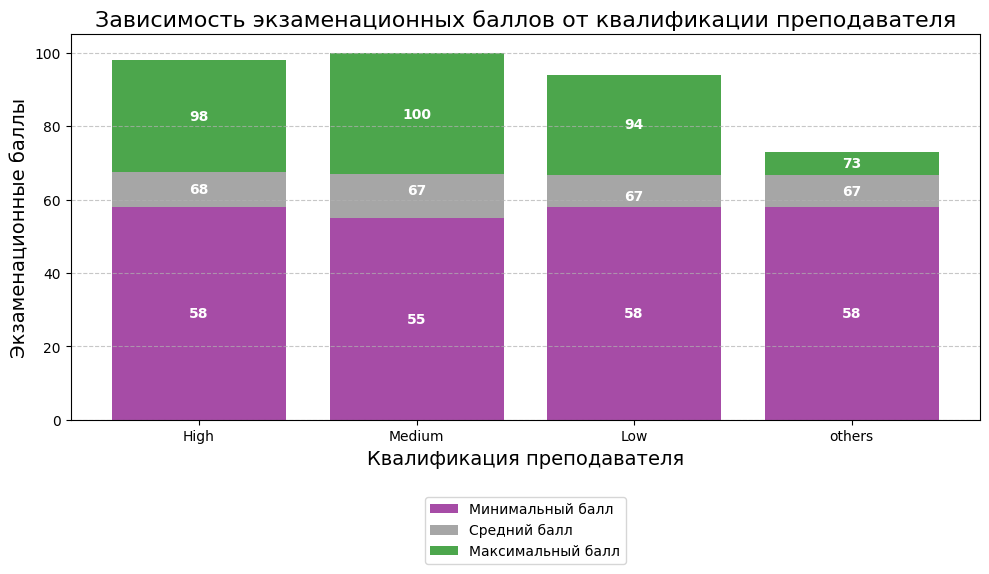

  Teacher_Quality  Exam_Score mean  Exam_Score max  Exam_Score min
0            High        67.659815              98              58
2          Medium        67.102956             100              55
1             Low        66.753425              94              58
3          others        66.641026              73              58


In [ ]:
# Агрегация данных по квалификации преподавателя
df_type_Teacher_Quality = new_df.groupby(['Teacher_Quality']).agg({
    'Exam_Score': ['mean', 'max', 'min']
})

# Преобразуем MultiIndex в плоский
df_type_Teacher_Quality.columns = [' '.join(col).strip() for col in df_type_Teacher_Quality.columns.values]

# Возвращаем индекс обратно в столбец
df_type_Teacher_Quality.reset_index(inplace=True)

# Перестановка порядка категорий (High, Medium, Low, Other)
df_type_Teacher_Quality.sort_values(by='Teacher_Quality', ascending=True, key=lambda x: x.map({'High': 0, 'Medium': 1, 'Low': 2, 'Other': 3}), inplace=True)

# Подготовка данных для графика
categories = df_type_Teacher_Quality['Teacher_Quality']
mean_scores = df_type_Teacher_Quality['Exam_Score mean']
max_scores = df_type_Teacher_Quality['Exam_Score max']
min_scores = df_type_Teacher_Quality['Exam_Score min']

# Генерируем позиции для столбцов
positions = np.arange(len(categories))

# Настраиваем окно графика
plt.figure(figsize=(10, 6))

# Строим гистограмму с разделёнными зонами (без накопления):
# 1. Минус (нижняя часть) - Min
# 2. Между Min и Mean - Mean
# 3. Над Mean - Max
plt.bar(positions, min_scores, label='Минимальный балл', color='purple', alpha=0.7)
plt.bar(positions, mean_scores - min_scores, bottom=min_scores, label='Средний балл', color='grey', alpha=0.7)
plt.bar(positions, max_scores - mean_scores, bottom=mean_scores, label='Максимальный балл', color='green', alpha=0.7)

# Добавляем подписи данных на графике
for i, v in enumerate(min_scores):
    plt.text(i, v/2, str(round(v)), ha='center', va='center', color='white', weight='bold')

for i, v in enumerate(mean_scores):
    plt.text(i, (v + min_scores[i])/2, str(round(v)), ha='center', va='center', color='white', weight='bold')

for i, v in enumerate(max_scores):
    plt.text(i, (v + mean_scores[i])/2, str(round(v)), ha='center', va='center', color='white', weight='bold')

# Наносим подписи на оси X
plt.xticks(positions, categories)

# Настраиваем подпись и заглавие
plt.xlabel('Квалификация преподавателя', fontsize=14)
plt.ylabel('Экзаменационные баллы', fontsize=14)
plt.title('Зависимость экзаменационных баллов от квалификации преподавателя', fontsize=16)

# Добавляем легенду
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center', borderaxespad=0.)

# Автоустановка полей
plt.tight_layout()

# Отображаем график
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Выводим таблицу с красивым форматом
with pd.option_context('display.width', None):
    print(df_type_Teacher_Quality)

Преподаватели **с высоким уровнем квалификации демонстрируют самые высокие средние результаты среди обучающихся (67.66)**, однако разница **с категорией «medium» незначительна (67.10).**

Несмотря на небольшую разницу в средних показателях, преподаватели с высшим уровнем квалификации обеспечивают большее разнообразие результатов: экстремальные максимумы достигают высоких отметок (98), тогда как преподаватели категории «low» имеют менее выдающиеся максимумы (94).

Интересно отметить **стабильность минимальных оценок, особенно в группах с высокими и средними квалификациями педагогов (58 и 55 соответственно)**, что подчёркивает высокий порог успеха независимо от уровня преподавателя.

Преподавательская квалификация оказывает заметное воздействие на успешность сдачи экзаменов студентами. Хотя различия в средних результатах невелики, влияние проявляется в диапазоне максимальных достижений. **Повышение квалификации преподавателя способствует увеличению вероятности высокого индивидуального успеха у некоторых студентов, сохраняя при этом стабильный низкий порог для подавляющего большинства. **

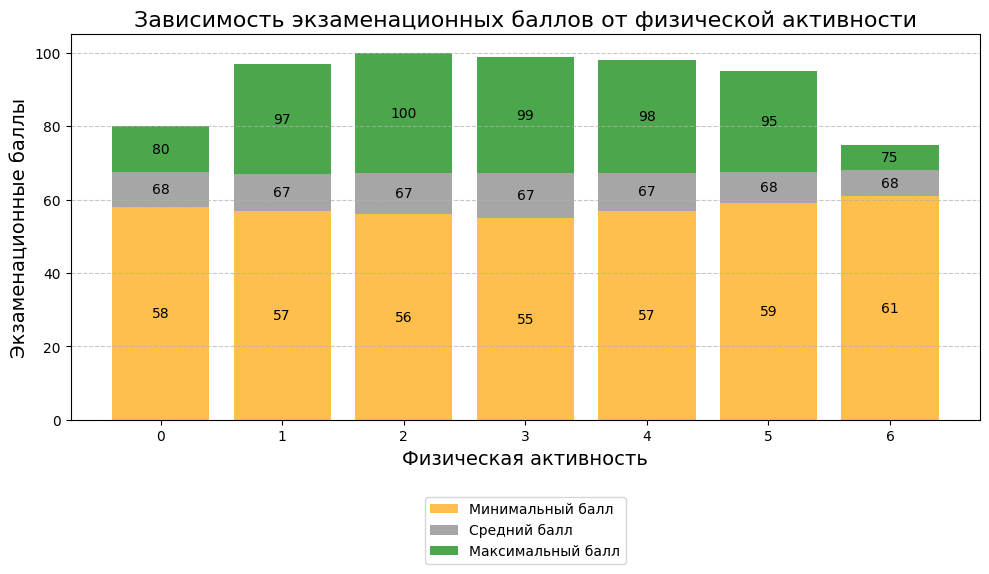

   Physical_Activity  Exam_Score mean  Exam_Score max  Exam_Score min
0                  0        67.521739              80              58
1                  1        66.969121              97              57
2                  2        67.169742             100              56
3                  3        67.182783              99              55
4                  4        67.313016              98              57
5                  5        67.603878              95              59
6                  6        68.093750              75              61


In [ ]:
# Агрегация данных по квалификации преподавателя
df_physical_activity = new_df.groupby(['Physical_Activity']).agg({
    'Exam_Score': ['mean', 'max', 'min']
})

# Преобразуем MultiIndex в плоский
df_physical_activity.columns = [' '.join(col).strip() for col in df_physical_activity.columns.values]

# Возвращаем индекс обратно в столбец
df_physical_activity.reset_index(inplace=True)

# Подготовка данных для Physical_Activity
categories = df_physical_activity['Physical_Activity']
mean_scores = df_physical_activity['Exam_Score mean']
max_scores = df_physical_activity['Exam_Score max']
min_scores = df_physical_activity['Exam_Score min']

# Генерируем позиции для столбцов
positions = np.arange(len(categories))

# Настраиваем окно графика
plt.figure(figsize=(10, 6))

# Строим гистограмму с разделёнными зонами (без накопления):
# 1. Минус (нижняя часть) - Min
# 2. Между Min и Mean - Mean
# 3. Над Mean - Max
plt.bar(positions, min_scores, label='Минимальный балл', color='orange', alpha=0.7)
plt.bar(positions, mean_scores - min_scores, bottom=min_scores, label='Средний балл', color='grey', alpha=0.7)
plt.bar(positions, max_scores - mean_scores, bottom=mean_scores, label='Максимальный балл', color='green', alpha=0.7)

# Добавляем подписи данных на графике
for i, v in enumerate(min_scores):
    plt.text(i, v/2, str(round(v)), ha='center', va='center', color='black')

for i, v in enumerate(mean_scores):
    plt.text(i, (v + min_scores[i])/2, str(round(v)), ha='center', va='center', color='black')

for i, v in enumerate(max_scores):
    plt.text(i, (v + mean_scores[i])/2, str(round(v)), ha='center', va='center', color='black')

# Наносим подписи на оси X
plt.xticks(positions, categories)

# Настраиваем подпись и заглавие
plt.xlabel('Физическая активность', fontsize=14)
plt.ylabel('Экзаменационные баллы', fontsize=14)
plt.title('Зависимость экзаменационных баллов от физической активности', fontsize=16)

# Добавляем легенду
plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center', borderaxespad=0.)

# Автоустановка полей
plt.tight_layout()

# Отображаем график
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Выводим таблицу с красивым форматом
with pd.option_context('display.width', None):
    print(df_physical_activity)

**Физическая активность влияет положительно**: наиболее активные участники (те, кто занимается физкультурой более 5 часов в неделю) демонстрируют устойчивый рост среднего экзаменационного балла. Особенно заметно улучшение среди тех, кто посвящает шесть часов еженедельно тренировкам — их средний балл достигает почти 68, что выше среднего показателя по всему набору данных.

**Участники с наименьшей активностью показали максимальную оценку в 80 баллов**, в то время как студенты, **занимающиеся спортом регулярно, смогли достичь 100 баллов**. Это говорит о потенциальной связи между физическими нагрузками и способностью достигать наилучших учебных результатов.

**Повышается минимальный балл**: студенты, проводящие более шести часов в неделю активно, редко получают низкие оценки (их минимальный балл начинается с 61).

При этом **самые активные в спорте, не получают очень высоких баллов за экзамен, что можно предположить, что в целом, у них нет высокой мотивации на максимальнные баллы**, важно получить хорошие отметки, но оставлять большее количество времени на занятие физическими активностиями.


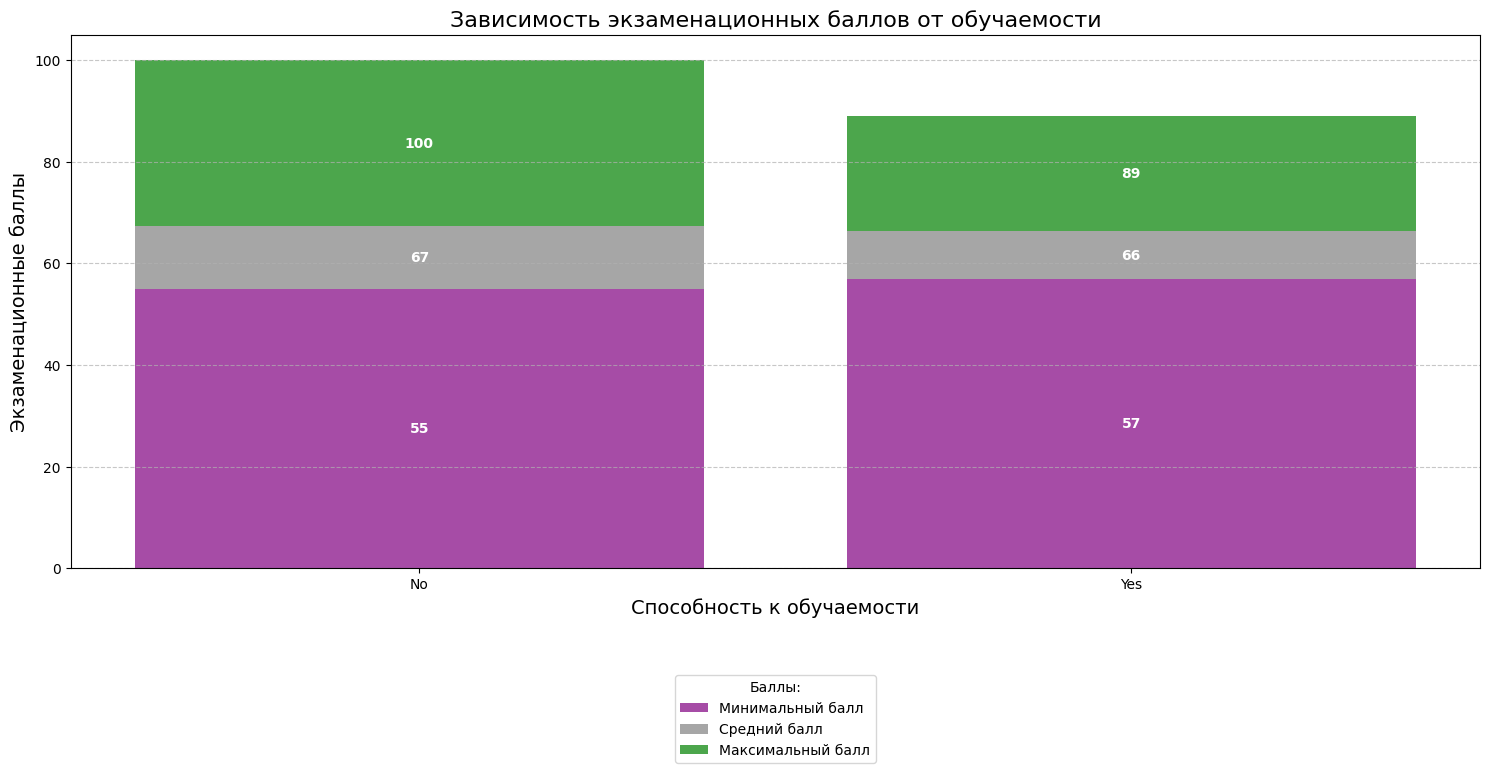

,Learning_Disabilities,Exam_Score count,Exam_Score mean,Exam_Score max,Exam_Score min
0,No,5910,67.339255,100,55
1,Yes,695,66.270504,89,57


In [ ]:
# Агрегация данных по способности к обучению
df_learning_disabilities = new_df.groupby(['Learning_Disabilities']).agg({
    'Exam_Score': ['count', 'mean', 'max', 'min']
})

# Преобразуем MultiIndex в обычные столбцы
df_learning_disabilities.columns = [' '.join(col).strip() for col in df_learning_disabilities.columns.values]

# Вернём индекс обратно в столбец, чтобы можно было обращаться к признакам
df_learning_disabilities.reset_index(inplace=True)

# Подготовка данных для графика
categories = df_learning_disabilities['Learning_Disabilities']
mean_scores = df_learning_disabilities['Exam_Score mean']
max_scores = df_learning_disabilities['Exam_Score max']
min_scores = df_learning_disabilities['Exam_Score min']

# Генерируем позиции для столбцов
positions = np.arange(len(categories))

# Настраиваем окно графика
plt.figure(figsize=(15, 8))

# Строим гистограмму с разделёнными зонами (без накопления):
# 1. Минус (нижняя часть) - Min
# 2. Между Min и Mean - Mean
# 3. Над Mean - Max
plt.bar(positions, min_scores, label='Минимальный балл', color='purple', alpha=0.7)
plt.bar(positions, mean_scores - min_scores, bottom=min_scores, label='Средний балл', color='grey', alpha=0.7)
plt.bar(positions, max_scores - mean_scores, bottom=mean_scores, label='Максимальный балл', color='green', alpha=0.7)

# Добавляем подписи данных на графике
for i, v in enumerate(min_scores):
    plt.text(i, v/2, str(round(v)), ha='center', va='center', color='white', weight='bold')

for i, v in enumerate(mean_scores):
    plt.text(i, (v + min_scores[i])/2, str(round(v)), ha='center', va='center', color='white', weight='bold')

for i, v in enumerate(max_scores):
    plt.text(i, (v + mean_scores[i])/2, str(round(v)), ha='center', va='center', color='white', weight='bold')

# Наносим подписи на оси X
plt.xticks(positions, categories)

# Настраиваем подпись и заглавие
plt.xlabel('Способность к обучаемости', fontsize=14)
plt.ylabel('Экзаменационные баллы', fontsize=14)
plt.title('Зависимость экзаменационных баллов от обучаемости', fontsize=16)

# Добавляем легенду с русским названием
plt.legend(title='Баллы:', bbox_to_anchor=(0.5,-0.2), loc='upper center', borderaxespad=0.)

# Автоустановка полей
plt.tight_layout()

# Отображаем график
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

df_learning_disabilities

Студенты, оценившие свои способности к обучаемости низко, получили на 11% ниже по максимальным баллам и на 1,1 % ниже при сравнении средних баллов, что может подтверждать их утверждение как низкую способность к обучаемости.

Тем не менее, при сравнении Минимальных экзаменационных баллов у группу с низкой обучаемостью, можно обратить внимание, что их баллы на 2 % опережают баллы группы студентов, не относящихся себя к группе с низкой обучаемостью. Что может говорить о том, что даже с низкой обучаемостью можно закрыть минимальные и средние пороги по оценкам.

In [ ]:
new_df[new_df['Gender'] == 'Female'].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000,2792.000000
mean,20.002507,79.862464,7.042264,75.046920,1.502149,2.961318,67.232808
std,5.996864,11.626999,1.458738,14.319746,1.231671,1.035006,4.004506
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,57.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,87.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,7.000000,6.000000,100.000000


In [ ]:
new_df[new_df['Gender'] == 'Male'].describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000,3813.000000
mean,19.958563,80.054812,7.020456,75.083923,1.486231,2.972463,67.222397
std,5.979316,11.488344,1.474548,14.460725,1.228651,1.028720,3.745421
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,39.000000,100.000000,10.000000,100.000000,8.000000,6.000000,99.000000


в целом, нет особой зависимости показателей от пола

**Трансформация строковых значений**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Предполагаемый df (если новый df не загружен)
# new_df = ...

# Определение соответствий для Parental_Involvement
mapping_dict = {
    'Low': 0,
    'Medium': 1,
    'High': 3
}

# Замена значений в колонке Parental_Involvement
new_df['Parental_Involvement'] = new_df['Parental_Involvement'].replace(mapping_dict)

# Инициализация LabelEncoder
le = LabelEncoder()

# Поиск всех строковых колонок (тип object)
object_columns = new_df.select_dtypes(include=['object'])

# Проверяем, входит ли Parental_Involvement в объекты
if 'Parental_Involvement' in object_columns.columns:
    object_columns = object_columns.drop(columns=['Parental_Involvement'])
else:
    print("Предупреждение: колонка Parental_Involvement не является объектом!")

# Кодируем каждую остающуюся строковую колонку
for column in object_columns.columns:
    new_df[column] = le.fit_transform(new_df[column])

# Проверка первых записей нового dataframe
print(new_df.head())

Предупреждение: колонка Parental_Involvement не является объектом!
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    0   
1             19          64                     0                    2   
2             24          98                     1                    2   
3             29          89                     0                    2   
4             19          92                     1                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 1   
1                           0            8               59                 1   
2                           1            7               91                 2   
3                           1            8               98                 2   
4                           1            6               65                 2

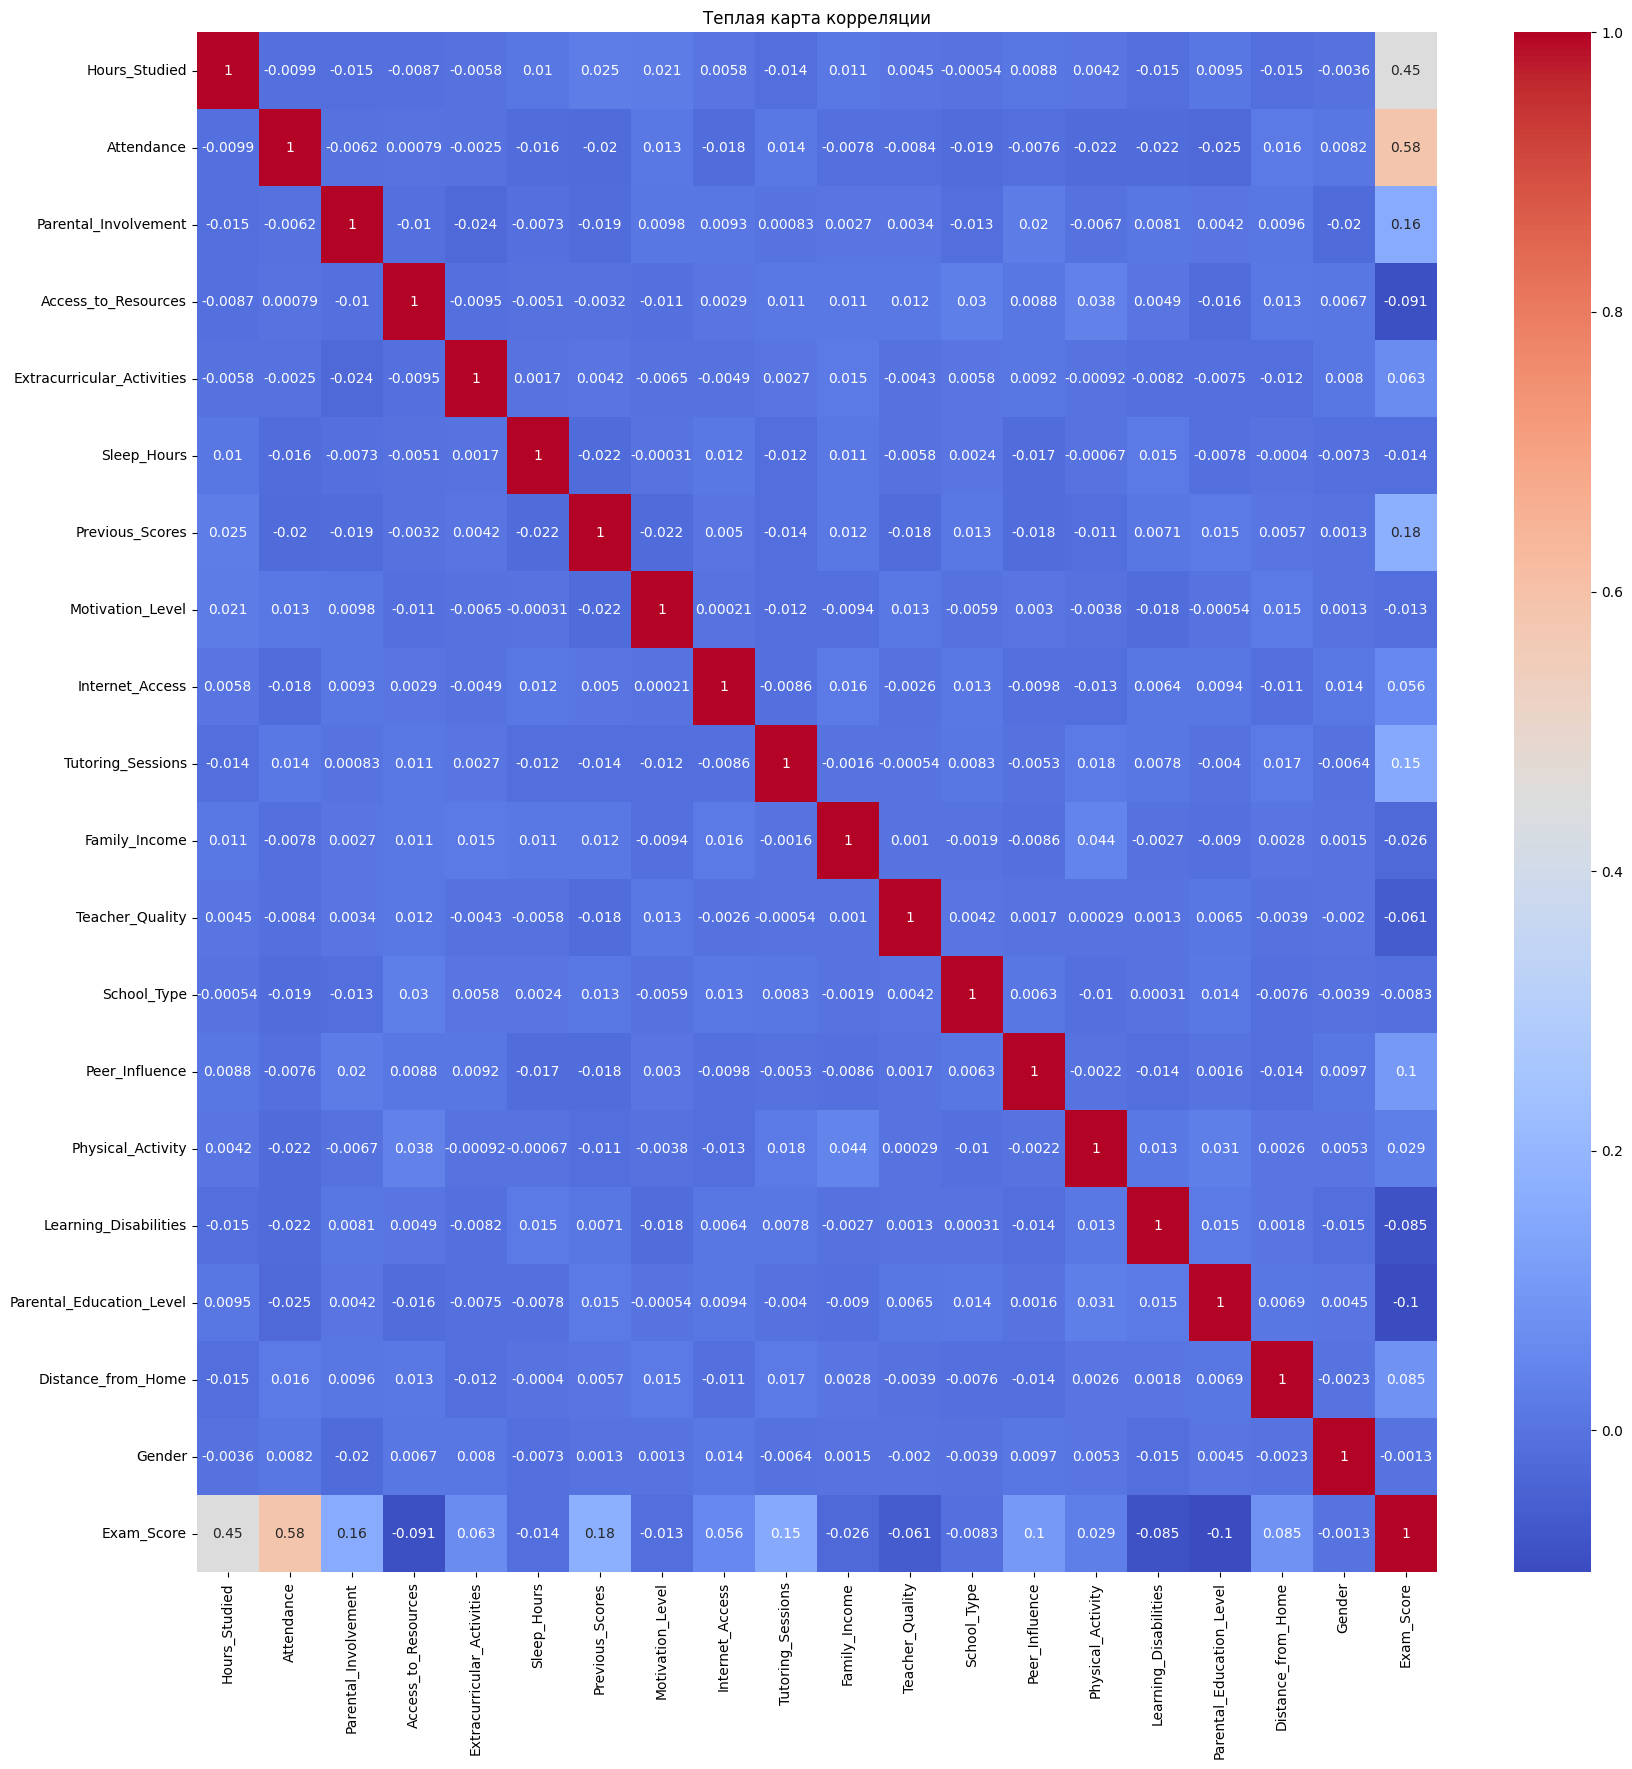

                            Hours_Studied  Attendance  Parental_Involvement  \
Hours_Studied                    1.000000   -0.009862             -0.015370   
Attendance                      -0.009862    1.000000             -0.006209   
Parental_Involvement            -0.015370   -0.006209              1.000000   
Access_to_Resources             -0.008742    0.000791             -0.010020   
Extracurricular_Activities      -0.005774   -0.002504             -0.024016   
Sleep_Hours                      0.010124   -0.015544             -0.007256   
Previous_Scores                  0.024547   -0.020465             -0.018829   
Motivation_Level                 0.021384    0.013372              0.009765   
Internet_Access                  0.005807   -0.017541              0.009350   
Tutoring_Sessions               -0.014224    0.013534              0.000833   
Family_Income                    0.010836   -0.007828              0.002675   
Teacher_Quality                  0.004515   -0.00844

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Расчет матрицы корреляции
corr_matrix = new_df.corr()
# Настраиваем окно графика
plt.figure(figsize=(20, 20))
# Создание теплой карты
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


# Заголовок графика
plt.title("Теплая карта корреляции")

# Отображение графика
plt.show()
print(corr_matrix)

In [ ]:
import statsmodels.api as sm

# Используем существующие колонки
X1 = corr_matrix['Attendance']
X2 = corr_matrix['Parental_Involvement']
X3 = corr_matrix['Hours_Studied']

# Наша зависимая переменная (целевая переменная)
y = corr_matrix['Exam_Score']  # Название целевой переменной нужно изменить на ваше собственное!

# Объединяем независимые переменные в DataFrame
X = pd.concat([X1, X2, X3], axis=1)

# Добавляем константу (intercept term)
X = sm.add_constant(X)

# Регрессия
model = sm.OLS(y, X).fit()

# Выведем результаты регрессии
print("Результаты множественной линейной регрессии:")
print(model.summary())

Результаты множественной линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     28.96
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           1.06e-06
Time:                        10:25:29   Log-Likelihood:                 16.979
No. Observations:                  20   AIC:                            -25.96
Df Residuals:                      16   BIC:                            -21.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Ключевая информация:
Dependent variable (зависимая переменная):Exam_Score.
R-Squared (коэффициент детерминации): 0.843


Примерно 84% вариации экзаменационного балла объясняется независимыми переменными. Это хороший показатель, говорящий о достаточной силе модели.


Adjusted R-Squared (скорректированный коэффициент детерминации): 0.813  
Скорректированное значение чуть ниже обычного R², что компенсирует количество используемых переменных и предупреждает от переобучения.


F-statistic (F-статистика): 28.60  
Очень большое значение F указывает на значимость модели.


Prob(F-statistic) (вероятность по F-статистике): 1.15e-06 (~0.000001)  
Малая вероятность подтверждает высокую значимость модели, независимые переменные вместе оказывают значительное влияние на оценки по экзаменам.


Количество наблюдений (Observations): 20  
Всего у нас 20 наблюдений (набора данных).


Число степеней свободы остаточной дисперсии (Residual Degrees of Freedom): 16  
Это число оставшихся степеней свободы после учета независимых переменных и константы.

Число степеней свободы модели (Model Degrees of Freedom):3  
Interpretation: Три независимых переменных (без учета константы).
Итоговая таблица коэффициентов (Coefficients Table):
Const (константа):  
Coef: 0.0214  
Std Err: 0.029  
t: 0.725  
P>|t|: 0.479  

Interpretation: Постоянная составляющая незначима (p-значение больше 0.05). Конкретное значение 0.0214 слабо сказывается на результате.
Attendance (посещаемость):  
Coef: 0.7345  
Std Err: 0.108  
t: 6.829  
P>|t|: 0.000  

Interpretation: Коэффициент положительный и высокозначимый (p << 0.05). Это означает, что посещение занятий положительно влияет на экзаменационный балл.
Parental Involvement (вовлеченность родителей):  
Coef: -0.1450  
Std Err: 0.121  
t: -1.193  
P>|t|: 0.250  
Interpretation: Эффект негативный, но статистически незначимый (p > 0.05). Уровень вовлеченности родителей не оказывает значимого влияния на экзаменационный балл.
Hours Studied (часов учебы):  
Coef: 0.5672  
Std Err: 0.114  
t: 4.975  
P>|t|: 0.000  
Interpretation: Положительное и высоко значимое влияние (p << 0.05). Больше часов учебы ведет к лучшему результату на экзамене.
Диагностика остатков:
Durbin-Watson statistic (DW):  
Value: 1.672  
Interpretation: DW ближе к 2, что говорит о незначительной автокоррелированности остатков. Идеальным значением считается 2, следовательно, предположение о независимости остатков принимается.
Jarque-Bera Test (test on normality):  
Value: 2.097  
Prob(JB): 0.350  
Interpretation: Остатки распределены приблизительно нормально (p-значение > 0.05).
Condition Number:  
Value: 4.76  
Interpretation: Небольшое значение, говорящее о низкой коллинеарности (между переменными нет сильной зависимости).
Вывод:
Ваша модель объясняет примерно 84% вариаций экзаменационного балла.
Наибольшее положительное влияние на экзамены оказывает посещаемость (Attendance) и часы подготовки (Hours_Studied).
Влияние родительской вовлеченности (Parental_Involvement) незначительно.
Нормальность остатков приемлема, и отсутствуют серьезные проблемы с автокорреляцией и коллинеарностью.
Таким образом, модель качественная и пригодна для дальнейшего использования в прогнозировании экзаменационных результатов.

In [ ]:
import statsmodels.api as sm

# Используем существующие колонки
X1 = corr_matrix['Sleep_Hours']
X2 = corr_matrix['Parental_Education_Level']
X3 = corr_matrix['Learning_Disabilities']

# Наша зависимая переменная (целевая переменная)
y = corr_matrix['Exam_Score']  # Название целевой переменной нужно изменить на ваше собственное!

# Объединяем независимые переменные в DataFrame
X = pd.concat([X1, X2, X3], axis=1)

# Добавляем константу (intercept term)
X = sm.add_constant(X)

# Регрессия
model = sm.OLS(y, X).fit()

# Выведем результаты регрессии
print("Результаты множественной линейной регрессии:")
print(model.summary())

Результаты множественной линейной регрессии:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.100
Date:                Wed, 19 Nov 2025   Prob (F-statistic):              0.378
Time:                        10:25:29   Log-Likelihood:                0.24384
No. Observations:                  20   AIC:                             7.512
Df Residuals:                      16   BIC:                             11.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

Анализируя матрицу коэффициентов корреляции, мы можем выделить несколько значимых факторов, влияющих на экзаменационную оценку (Exam_Score):

**Положительные корреляции:**
**Часы подготовки (Hours_Studied)**: Коэффициент корреляции = 0.451330 показывает, что увеличение часов подготовки положительно связано с повышением экзаменационной оценки.

**Посещаемость занятий (Attendance)**: Самый высокий показатель среди положительных корреляций = 0.583620. Посещение уроков оказывает значительное положительное влияние на успеваемость учеников.

**Дополнительные занятия (Tutoring_Sessions)**: Небольшая положительная связь — 0.153060. Индивидуальные занятия способствуют улучшению результата экзамена.
При более подробном анализе выше были сделаны выводы, что данныу улучшения достигаются в основном за счет повышения минимальных экзаменационных результатов. Причиной может служить то, что студенты с низкой успеваюемость активнее прибегают к услгуам репетиторов, что действительно помогает повысить оценки за экзамен.

**Предыдущие достижения (Previous_Scores)**: Умеренно-положительный коэффициент = 0.175213. Ранее достигнутые успехи являются фактором успеха и на последующих экзаменах. Что в целом, говорит о сохранении уровня знаний студентами.

**Социальное окружение (Peer_Influence)**: Маленькая позитивная зависимость = 0.101248. Обучение среди мотивированных сверстников способствует повышению итоговых показателей. Это может создавать здоровую конкурентную среду, а также возможность получать поддержку в обучении среди сверстников.

**Отрицательные корреляции:**
**Участие родителей (Parental_Involvement)**: Отрицательная корреляция =
− 0.095672. Чрезмерное вмешательство родителей может оказывать негативное воздействие на учащихся.
Доступ к ресурсам (Access_to_Resources): Минимально отрицательное влияние =
− 0.091195. Это может быть связано с отвлечением от учебы.

Физическая активность (Physical_Activity): Практически нулевое влияние = 0.028945. Регулярные физические нагрузки слабо связаны с результатами экзаменов.

Обучающие трудности (Learning_Disabilities): Незначительно отрицательно влияет =
−
0.085035. Наличие проблем с усвоением материала снижает вероятность высоких оценок.

Образование родителей (Parental_Education_Level): Минусовая корреляция =
− 0.101436. Низкое образование родителей незначительно сказывается негативно на результатах детей.

Квалификация преподавателя (Teacher_Quality): Очень слабая негативная корреляция = − 0.061132. Квалификация преподавателя не сильно влияет на экзамены.

Тип школы (School_Type): Нулевая корреляция = −
0.008329
−0.008329. Тип учебного заведения практически никак не отражается на результатах экзаменов.
Факторов с минимальной корреляцией (< |0.1|):
Большинство остальных факторов демонстрируют либо крайне слабые положительные, либо незначительные негативные связи с экзаменационными оценками. Среди них:



In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6605 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6605 non-null   int64
 1   Attendance                  6605 non-null   int64
 2   Parental_Involvement        6605 non-null   int64
 3   Access_to_Resources         6605 non-null   int64
 4   Extracurricular_Activities  6605 non-null   int64
 5   Sleep_Hours                 6605 non-null   int64
 6   Previous_Scores             6605 non-null   int64
 7   Motivation_Level            6605 non-null   int64
 8   Internet_Access             6605 non-null   int64
 9   Tutoring_Sessions           6605 non-null   int64
 10  Family_Income               6605 non-null   int64
 11  Teacher_Quality             6605 non-null   int64
 12  School_Type                 6605 non-null   int64
 13  Peer_Influence              6605 non-null   int64
 14  Physical_Acti

                      count  min  max       mean
Parental_Involvement                            
- High                   1908   57  100  68.092767
- Medium                 3361   55   97  67.090747
- Low                    1336   56   98  66.332335

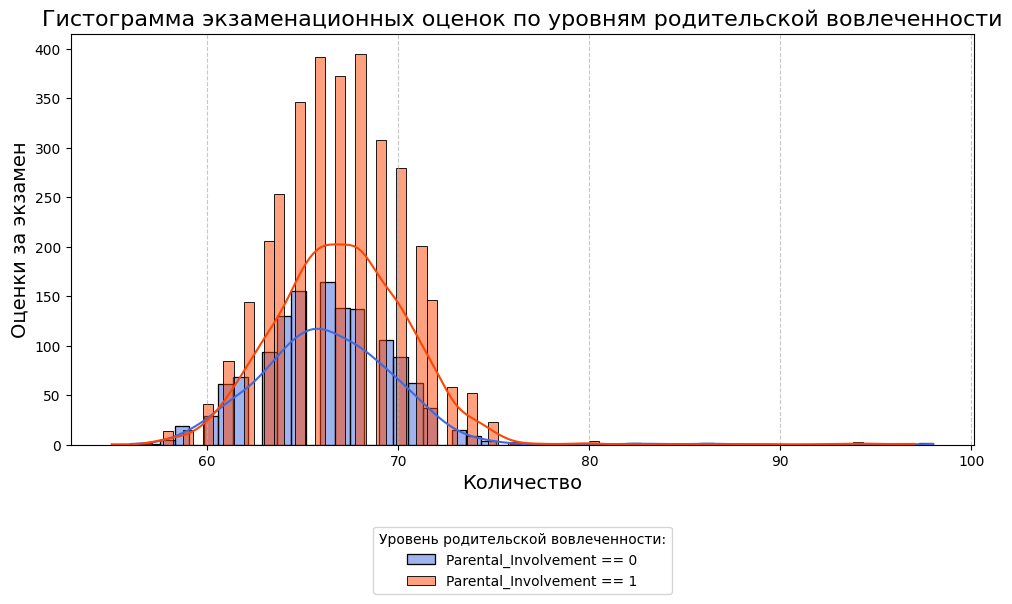

Уникальные значения Parental_Involvement:
[0 1 3]

Все значения Parental_Involvement:
0       0
1       0
2       1
3       0
4       1
       ..
6602    3
6603    3
6604    1
6605    3
6606    1
Name: Parental_Involvement, Length: 6605, dtype: int64


In [ ]:
# Настраиваем окно графика
plt.figure(figsize=(10, 6))
# Фильтруем данные и создаём три слоя гистограммы (горизонтальные)
sns.histplot(data=new_df[new_df['Parental_Involvement'] == 0]['Exam_Score'], orientation='horizontal', kde=True, color='royalblue', label='Parental_Involvement == 0')
sns.histplot(data=new_df[new_df['Parental_Involvement'] == 1]['Exam_Score'], orientation='horizontal', kde=True, color='orangered', label='Parental_Involvement == 1')
sns.histplot(data=new_df[new_df['Parental_Involvement'] == 2]['Exam_Score'], orientation='horizontal', kde=True, color='forestgreen', label='Parental_Involvement == 2')

# Добавляем легенду с русским названием
plt.legend(title='Уровень родительской вовлеченности:', bbox_to_anchor=(0.5,-0.2), loc='upper center', borderaxespad=0., frameon=True)

# Автоустановка полей
plt.tight_layout()

# Меняем местами подписи осей
plt.ylabel('Оценки за экзамен', fontsize=14)
plt.xlabel('Количество', fontsize=14)
plt.title('Гистограмма экзаменационных оценок по уровням родительской вовлеченности', fontsize=16)

# Отображаем график
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Запрос оригинальных значений колонки Parental_Involvement
original_values = new_df['Parental_Involvement']

# Выводим уникальные значения (варианты, присутствующие в колонке)
unique_values = original_values.unique()
print("Уникальные значения Parental_Involvement:")
print(unique_values)

# Или выведем все значения подряд
print("\nВсе значения Parental_Involvement:")
print(original_values)

0 - high
1 - low
2 - medium

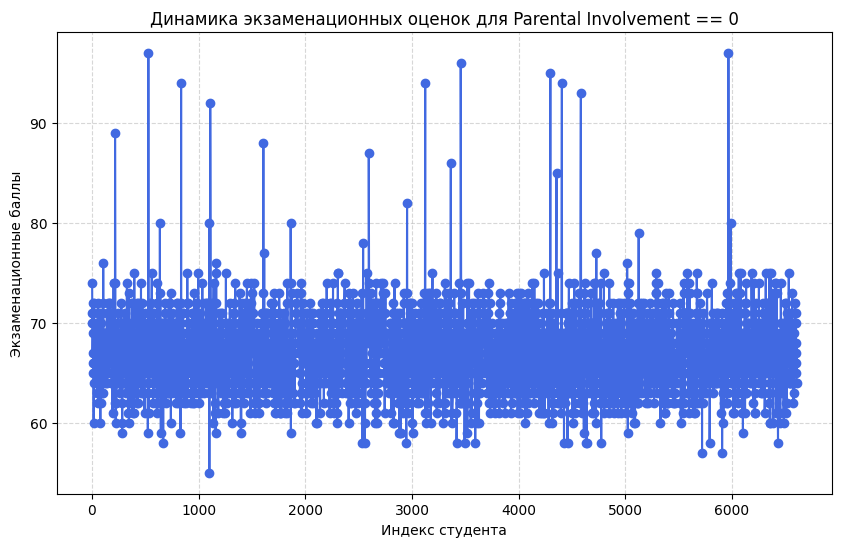

In [ ]:
import matplotlib.pyplot as plt

# Фильтрация данных: оставляем только тех студентов, чьи родители участвуют на уровне '0'
filtered_students = new_df[new_df['Parental_Involvement'] == 1]

# Проверка наличия данных после фильтрации
if len(filtered_students) == 0:
    print("Нет данных для Parental_Involvement == 0")
else:
    # Извлечение экзаменационных оценок
    exam_scores_filtered = filtered_students['Exam_Score']

    # Постройте линейный график
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_students.index, exam_scores_filtered, marker='o', linestyle='-', color='royalblue')

    # Оформите график
    plt.title('Динамика экзаменационных оценок для Parental Involvement == 0')
    plt.xlabel('Индекс студента')
    plt.ylabel('Экзаменационные баллы')
    plt.grid(linestyle='--', alpha=0.5)

    # Покажите график
    plt.show()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6605 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6605 non-null   int64
 1   Attendance                  6605 non-null   int64
 2   Parental_Involvement        6605 non-null   int64
 3   Access_to_Resources         6605 non-null   int64
 4   Extracurricular_Activities  6605 non-null   int64
 5   Sleep_Hours                 6605 non-null   int64
 6   Previous_Scores             6605 non-null   int64
 7   Motivation_Level            6605 non-null   int64
 8   Internet_Access             6605 non-null   int64
 9   Tutoring_Sessions           6605 non-null   int64
 10  Family_Income               6605 non-null   int64
 11  Teacher_Quality             6605 non-null   int64
 12  School_Type                 6605 non-null   int64
 13  Peer_Influence              6605 non-null   int64
 14  Physical_Acti

In [ ]:
print(filtered_students.head())

   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
2             24          98                     1                    2   
4             19          92                     1                    2   
5             19          88                     1                    2   
6             29          84                     1                    1   
8             17          94                     1                    0   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
2                           1            7               91                 2   
4                           1            6               65                 2   
5                           1            8               89                 2   
6                           1            7               68                 1   
8                           0            6               80                 0   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_